# EDA Notebook

#### Name: Jonah Zembower
#### AndrewID: jzembowe
#### Date: December 5, 2025

### Project Overview

This notebook explores the **Emergency Department (ED) triage dataset** from the Kaggle challenge on building a **triage decision support model**. The goal of the challenge is to use routinely collected ED triage data to predict whether a patient’s assigned triage acuity (KTAS – Korean Triage and Acuity Scale) is appropriate or represents **mistriage** (over‑ or under‑triage).  

Each row corresponds to a single ED visit and includes:

- **Demographics** (e.g., age, sex, group)
- **Operational context** (e.g., number of patients per hour, arrival mode)
- **Clinical presentation** (e.g., injury flag, chief complaint, mental status, pain score, vital signs)
- **Triage decisions** (nurse-assigned KTAS, expert KTAS, error group)
- **Clinical outcomes** (ED diagnosis, disposition, length of stay)
- **Target label** (`mistriage`), indicating whether the triage level was judged incorrect.

The objective of this EDA is to understand the distribution and quality of these features, identify data quality issues, and generate insights to guide feature engineering and model development for the triage misclassification prediction task.

---

### Data Types and Columns

In the raw `data.csv`, many features are read as strings, but conceptually they fall into:

- **Categorical variables (nominal / ordinal)**
  - `Group` – patient group (categorical/ordinal code)
  - `Sex` – biological sex code
  - `Arrival mode` – mode of ED arrival (e.g., walk-in, ambulance) as code
  - `Injury` – injury vs. non-injury indicator
  - `Chief_complain` – free-text chief complaint (high-cardinality categorical / text)
  - `Mental` – mental status category code
  - `Pain` – pain category code
  - `KTAS_RN` – triage level assigned by triage nurse (ordered 1–5, ordinal)
  - `Diagnosis in ED` – ED diagnosis text/category
  - `Disposition` – ED disposition (e.g., discharge, admit, transfer) as code
  - `KTAS_expert` – triage level assigned by expert (ordered 1–5, ordinal)
  - `Error_group` – type of triage error (e.g., correct, under, over) as code

- **Numeric variables (continuous / discrete)**
  - `Age` – patient age (integer)
  - `Patients number per hour` – ED crowding proxy (integer)
  - `NRS_pain` – numeric rating scale (0–10) pain score
  - Vital signs:
    - `SBP` – systolic blood pressure
    - `DBP` – diastolic blood pressure
    - `HR` – heart rate
    - `RR` – respiratory rate
    - `BT` – body temperature (may be numeric but sometimes missing/blank)
    - `Saturation` – oxygen saturation (%)
  - Time-related:
    - `Length of stay_min` – ED length of stay in minutes
    - `KTAS duration_min` – time from arrival to triage, in minutes
  - **Note:** In the raw CSV, some numeric columns (e.g., `KTAS duration_min`) may use commas as decimal separators and will need cleaning and conversion to numeric types.

- **Target / label**
  - `mistriage` – binary indicator (0/1) where `1` typically denotes a triage error (misclassification) and `0` denotes appropriate triage.

- Initial Variable Values:
  - Sex: Sex of the patient
  - Age: Age of the patient
  - Arrival mode: Type of transportation to the hospital
  - Injury: Whether the patient is injured or not
  - Chief_complain: The patient's complaint
  - Mental: The mental state of the patient
  - Pain: Whether the patient has pain
  - NRS_pain: Nurse's assessment of pain for the patient
  - SBP: Systolic Blood Pressure.
  - DBP: Diastolic Blood Pressure.
  - HR: Heat Rate.
  - RR: Respiratory rate
  - BT: Body Temperature
- Categorical Variable Values:
  - Reason Visit : Injury [1 = No, 2= Yes]
  - Gender : Sex [1 = Famale, 2 = Male]
  - Pain : Pain [1 = Yes, 0 = No]
  - Menatal : Mental [1 = Alert, 2 = Verbol Response, 3 = Pain Response, 4 = Unresponse]
  - Type of ED : Group [1 = Local ED 3th Degree, 2 = Regional ED 4tg Degree]
  - Mode of Arrival : Arrival Mode [1 = Walking, 2 = Public Ambulance, 3 = Private Vehicle, 4 = Private Ambulance, 5,6,7 = Other]
  - Disposition : Disposition [1 = Dischange, 2 = Admission to ward, 3 = Admission to ICU, 4 = Disharge, 5 = Transfer, 6 = Death, 7 = Surgery]
  - KTAS : KTAS… [1,2,3 = Emergency, 4,5 = Non-Emergency]

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

# Load the dataset with different encoding
df = pd.read_csv('data.csv', sep=';', encoding='latin-1')

print("="*80)
print("EMERGENCY DEPARTMENT TRIAGE ANALYSIS")
print("Exploratory Data Analysis & Machine Learning Enhancement")
print("="*80)
print("\n")

print("1. DATASET OVERVIEW")
print("-"*80)
print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")
print("\n")

print("First 5 rows of the dataset:")
print(df.head())
print("\n")

print("Dataset Data Types:")
print(df.dtypes)
print("\n")

print("Column Names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

EMERGENCY DEPARTMENT TRIAGE ANALYSIS
Exploratory Data Analysis & Machine Learning Enhancement


1. DATASET OVERVIEW
--------------------------------------------------------------------------------
Dataset shape: (1267, 24)
Number of rows: 1,267
Number of columns: 24


First 5 rows of the dataset:
   Group  Sex  Age  Patients number per hour  Arrival mode  Injury  \
0      2    2   71                         3             3       2   
1      1    1   56                        12             3       2   
2      2    1   68                         8             2       2   
3      1    2   71                         8             1       1   
4      1    2   58                         4             3       1   

       Chief_complain  Mental  Pain NRS_pain  ...    BT Saturation KTAS_RN  \
0   right ocular pain       1     1        2  ...  36.6        100       2   
1  right forearm burn       1     1        2  ...  36.5        NaN       4   
2        arm pain, Lt       1     1        2  .


2. DATA QUALITY ASSESSMENT
--------------------------------------------------------------------------------

2.1 Missing Values Analysis
--------------------------------------------------------------------------------

Columns with Missing Values:
         Column  Missing Count  Missing Percentage
     Saturation            688           54.301500
Diagnosis in ED              2            0.157853


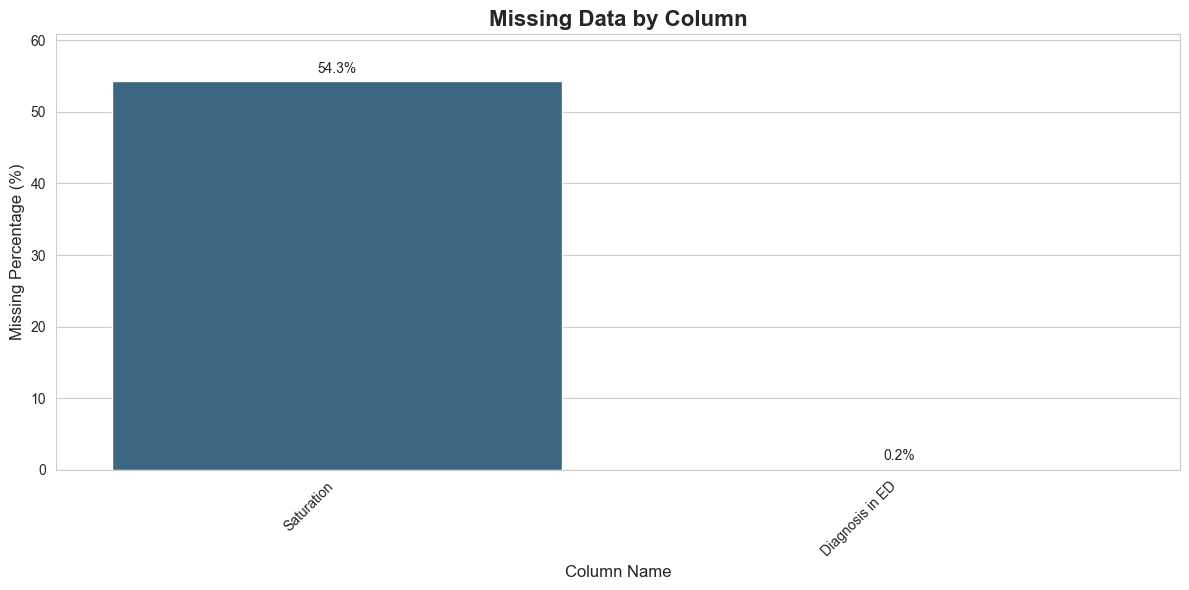


✓ Missing data visualization saved as 'Images/missing_data_analysis.png'



In [3]:
# Assessing data quality
print("\n2. DATA QUALITY ASSESSMENT")
print("-"*80)
print("\n2.1 Missing Values Analysis")
print("-"*80)

# Check for missing values
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Count': missing_data.values,
    'Missing Percentage': missing_percent.values
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

print("\nColumns with Missing Values:")
print(missing_df.to_string(index=False))

# Visualize missing data (with labels on top of bars)
fig, ax = plt.subplots(figsize=(12, 6))
if len(missing_df) > 0:
    sns.barplot(data=missing_df, x='Column', y='Missing Percentage', palette='viridis', ax=ax)
    ax.set_title('Missing Data by Column', fontsize=16, fontweight='bold')
    ax.set_xlabel('Column Name', fontsize=12)
    ax.set_ylabel('Missing Percentage (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right')

    # Add numeric labels on top of each bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}%',                 # label text
                    xy=(p.get_x() + p.get_width() / 2., height),  # position at top-center of bar
                    xytext=(0, 4),                # offset text 4 points above
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

    # Make a little space above the tallest bar so labels don't get cutoff
    ymax = missing_df['Missing Percentage'].max() * 1.12
    ax.set_ylim(0, ymax if ymax > 10 else max(ymax, 10))

    plt.tight_layout()
    plt.savefig('Images/missing_data_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("\n✓ Missing data visualization saved as 'Images/missing_data_analysis.png'")
else:
    print("\n✓ No missing values found in the dataset!")

print("\n" + "="*80)

The data showcases above relatively clean outputs. However, there is one variable that is clearly missing in most cases and won't likely be useful for further analysis unfortunately. 

In [4]:
# Cleaning Data
print("\n3. DATA CLEANING & PREPROCESSING")
print("-"*80)

# Clean numeric columns that are stored as objects
print("\n3.1 Converting Data Types")
print("-"*40)

# Function to clean numeric columns
def clean_numeric(series):
    """Convert string numbers with commas to float"""
    if series.dtype == 'object':
        return pd.to_numeric(series.str.replace(',', '.'), errors='coerce')
    return series

# Clean vital signs columns
numeric_cols = ['NRS_pain', 'SBP', 'DBP', 'HR', 'RR', 'BT', 'Saturation', 'KTAS duration_min']
for col in numeric_cols:
    if col in df.columns:
        df[col] = clean_numeric(df[col])
        print(f"✓ Converted {col} to numeric")

# Convert categorical codes to meaningful labels
print("\n3.2 Creating Categorical Labels")
print("-"*40)

# Sex
df['Sex_Label'] = df['Sex'].map({1: 'Female', 2: 'Male'})
print("✓ Created Sex_Label (1=Female, 2=Male)")

# Group (ED Type)
df['Group_Label'] = df['Group'].map({1: 'Local ED (3rd Degree)', 2: 'Regional ED (4th Degree)'})
print("✓ Created Group_Label")

# Injury
df['Injury_Label'] = df['Injury'].map({1: 'No', 2: 'Yes'})
print("✓ Created Injury_Label")

# Pain
df['Pain_Label'] = df['Pain'].map({0: 'No', 1: 'Yes'})
print("✓ Created Pain_Label")

# Mental Status
df['Mental_Label'] = df['Mental'].map({
    1: 'Alert',
    2: 'Verbal Response',
    3: 'Pain Response',
    4: 'Unresponsive'
})
print("✓ Created Mental_Label")

# KTAS Categories (Emergency vs Non-Emergency)
df['KTAS_RN_Category'] = df['KTAS_RN'].apply(lambda x: 'Emergency' if x <= 3 else 'Non-Emergency')
df['KTAS_Expert_Category'] = df['KTAS_expert'].apply(lambda x: 'Emergency' if x <= 3 else 'Non-Emergency')
print("✓ Created KTAS categories (1-3=Emergency, 4-5=Non-Emergency)")

# Mistriage label
df['Mistriage_Label'] = df['mistriage'].map({0: 'Correct', 1: 'Under-triage', 2: 'Over-triage'})
print("✓ Created Mistriage_Label")

# Disposition Mapping
# Mapping based on your description
disposition_map = {
    1: "Dischange",            # as given
    2: "Admission_to_ward",
    3: "Admission_to_ICU",
    4: "Disharge",             # as given
    5: "Transfer",
    6: "Death",
    7: "Surgery"
}
# If Disposition is read as string, convert to int first
df["Disposition"] = df["Disposition"].astype(int)
# Create one dummy column per disposition code
for code, label in disposition_map.items():
    col_name = f"Disposition_{label}"
    df[col_name] = (df["Disposition"] == code).astype(int)
print("✓ Created Disposition_Labels")

print(f"\n✓ Dataset now has {df.shape[1]} columns after preprocessing")
print("\nSample of cleaned data:")
print(df[['Age', 'Sex_Label', 'SBP', 'DBP', 'HR', 'BT', 'KTAS_RN_Category', 'Mistriage_Label']].head())


3. DATA CLEANING & PREPROCESSING
--------------------------------------------------------------------------------

3.1 Converting Data Types
----------------------------------------
✓ Converted NRS_pain to numeric
✓ Converted SBP to numeric
✓ Converted DBP to numeric
✓ Converted HR to numeric
✓ Converted RR to numeric
✓ Converted BT to numeric
✓ Converted Saturation to numeric
✓ Converted KTAS duration_min to numeric

3.2 Creating Categorical Labels
----------------------------------------
✓ Created Sex_Label (1=Female, 2=Male)
✓ Created Group_Label
✓ Created Injury_Label
✓ Created Pain_Label
✓ Created Mental_Label
✓ Created KTAS categories (1-3=Emergency, 4-5=Non-Emergency)
✓ Created Mistriage_Label
✓ Created Disposition_Labels

✓ Dataset now has 39 columns after preprocessing

Sample of cleaned data:
   Age Sex_Label    SBP    DBP     HR    BT KTAS_RN_Category Mistriage_Label
0   71      Male  160.0  100.0   84.0  36.6        Emergency    Under-triage
1   56    Female  137.0   75.0 


4. DESCRIPTIVE STATISTICS
--------------------------------------------------------------------------------

4.1 Summary Statistics for Numerical Variables
--------------------------------------------------------------------------------
           Age      SBP      DBP       HR       RR       BT  NRS_pain  \
count  1267.00  1242.00  1238.00  1247.00  1245.00  1249.00    711.00   
mean     54.42   133.65    79.78    83.96    19.51    36.58      4.10   
std      19.73    27.28    15.15    16.64     2.02     0.55      1.42   
min      16.00    50.00    31.00    32.00    14.00    35.00      1.00   
25%      37.00   114.00    70.00    72.00    18.00    36.20      3.00   
50%      57.00   130.00    80.00    82.00    20.00    36.50      4.00   
75%      71.00   150.00    90.00    96.00    20.00    36.80      5.00   
max      96.00   275.00   160.00   148.00    30.00    41.00     10.00   

       Length of stay_min  
count             1267.00  
mean             11016.10  
std              8044

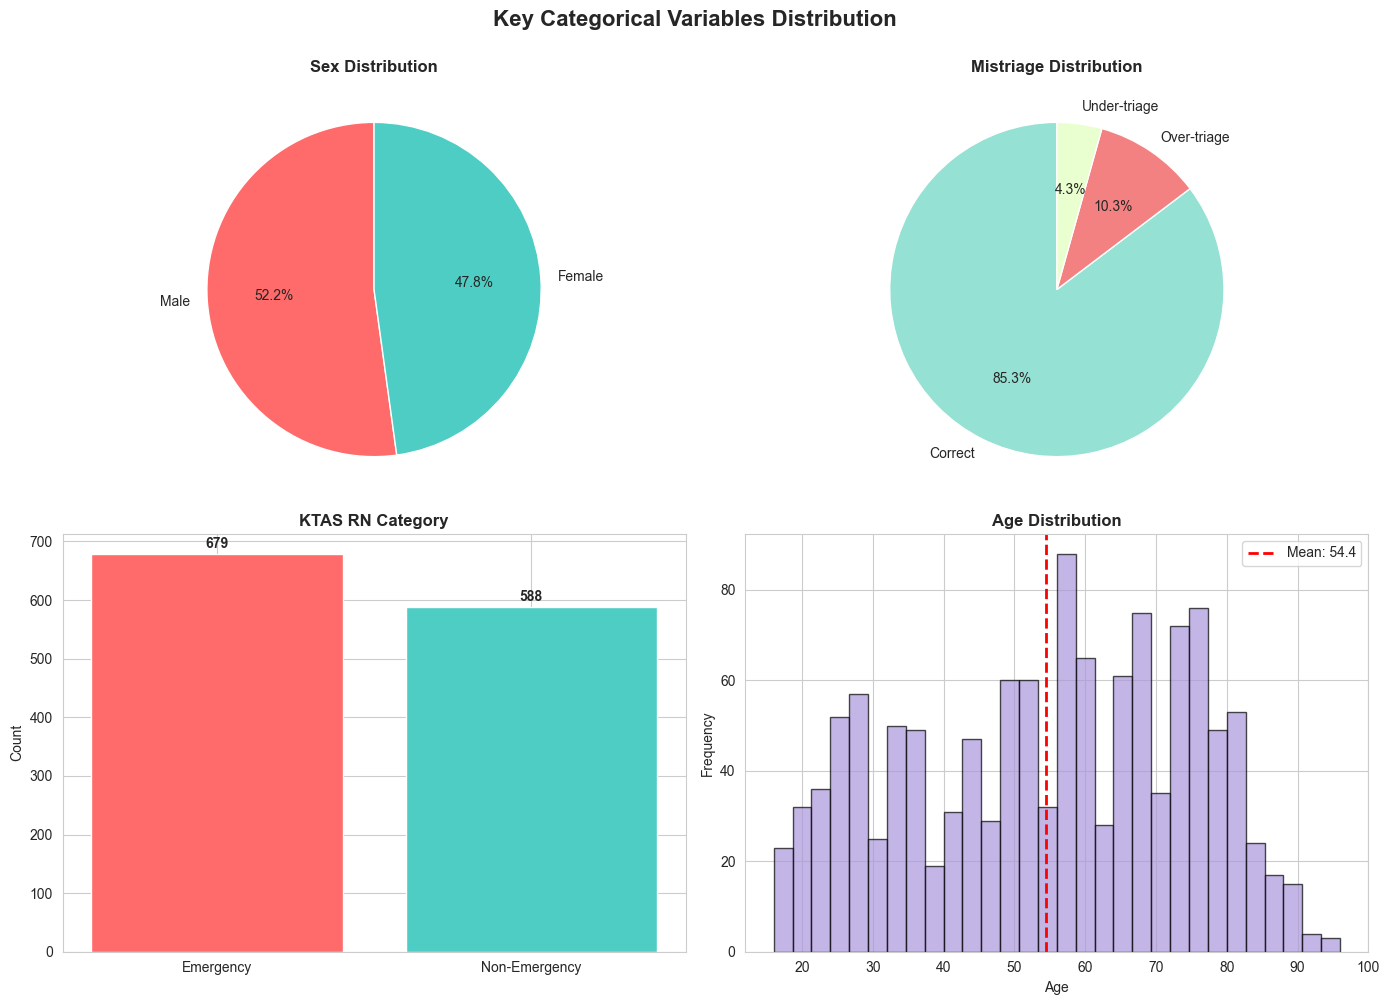


✓ Categorical distributions visualization saved as 'Images/categorical_distributions.png'


In [5]:
# Clean numeric columns
def clean_numeric(series):
    if series.dtype == 'object':
        return pd.to_numeric(series.str.replace(',', '.'), errors='coerce')
    return series

numeric_cols = ['NRS_pain', 'SBP', 'DBP', 'HR', 'RR', 'BT', 'Saturation']
for col in numeric_cols:
    if col in df.columns:
        df[col] = clean_numeric(df[col])

# Create labels
df['Sex_Label'] = df['Sex'].map({1: 'Female', 2: 'Male'})
df['Mistriage_Label'] = df['mistriage'].map({0: 'Correct', 1: 'Under-triage', 2: 'Over-triage'})
df['KTAS_RN_Category'] = df['KTAS_RN'].apply(lambda x: 'Emergency' if x <= 3 else 'Non-Emergency')

print("\n4. DESCRIPTIVE STATISTICS")
print("-"*80)

print("\n4.1 Summary Statistics for Numerical Variables")
print("-"*80)

# Select key numerical columns
key_numeric = ['Age', 'SBP', 'DBP', 'HR', 'RR', 'BT', 'NRS_pain', 'Length of stay_min']
stats_df = df[key_numeric].describe().round(2)
print(stats_df)

print("\n4.2 Categorical Variables Distribution")
print("-"*80)

print("\nSex Distribution:")
print(df['Sex_Label'].value_counts())
print(f"\nPercentage: \n{df['Sex_Label'].value_counts(normalize=True).mul(100).round(2)}")

print("\n" + "-"*40)
print("\nMistriage Distribution:")
print(df['Mistriage_Label'].value_counts())
print(f"\nPercentage: \n{df['Mistriage_Label'].value_counts(normalize=True).mul(100).round(2)}")

print("\n" + "-"*40)
print("\nKTAS RN Category Distribution:")
print(df['KTAS_RN_Category'].value_counts())
print(f"\nPercentage: \n{df['KTAS_RN_Category'].value_counts(normalize=True).mul(100).round(2)}")

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Key Categorical Variables Distribution', fontsize=16, fontweight='bold', y=1.00)

# Sex distribution
sex_counts = df['Sex_Label'].value_counts()
axes[0, 0].pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['#FF6B6B', '#4ECDC4'])
axes[0, 0].set_title('Sex Distribution', fontsize=12, fontweight='bold')

# Mistriage distribution
mistriage_counts = df['Mistriage_Label'].value_counts()
colors_mistriage = ['#95E1D3', '#F38181', '#EAFFD0']
axes[0, 1].pie(mistriage_counts, labels=mistriage_counts.index, autopct='%1.1f%%', startangle=90, colors=colors_mistriage)
axes[0, 1].set_title('Mistriage Distribution', fontsize=12, fontweight='bold')

# KTAS Category
ktas_counts = df['KTAS_RN_Category'].value_counts()
axes[1, 0].bar(ktas_counts.index, ktas_counts.values, color=['#FF6B6B', '#4ECDC4'])
axes[1, 0].set_title('KTAS RN Category', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Count', fontsize=10)
for i, v in enumerate(ktas_counts.values):
    axes[1, 0].text(i, v + 10, str(v), ha='center', fontweight='bold')

# Age distribution
axes[1, 1].hist(df['Age'].dropna(), bins=30, color='#AA96DA', edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Age Distribution', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Age', fontsize=10)
axes[1, 1].set_ylabel('Frequency', fontsize=10)
axes[1, 1].axvline(df['Age'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Age"].mean():.1f}')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('Images/categorical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Categorical distributions visualization saved as 'Images/categorical_distributions.png'")


5. VITAL SIGNS ANALYSIS
--------------------------------------------------------------------------------


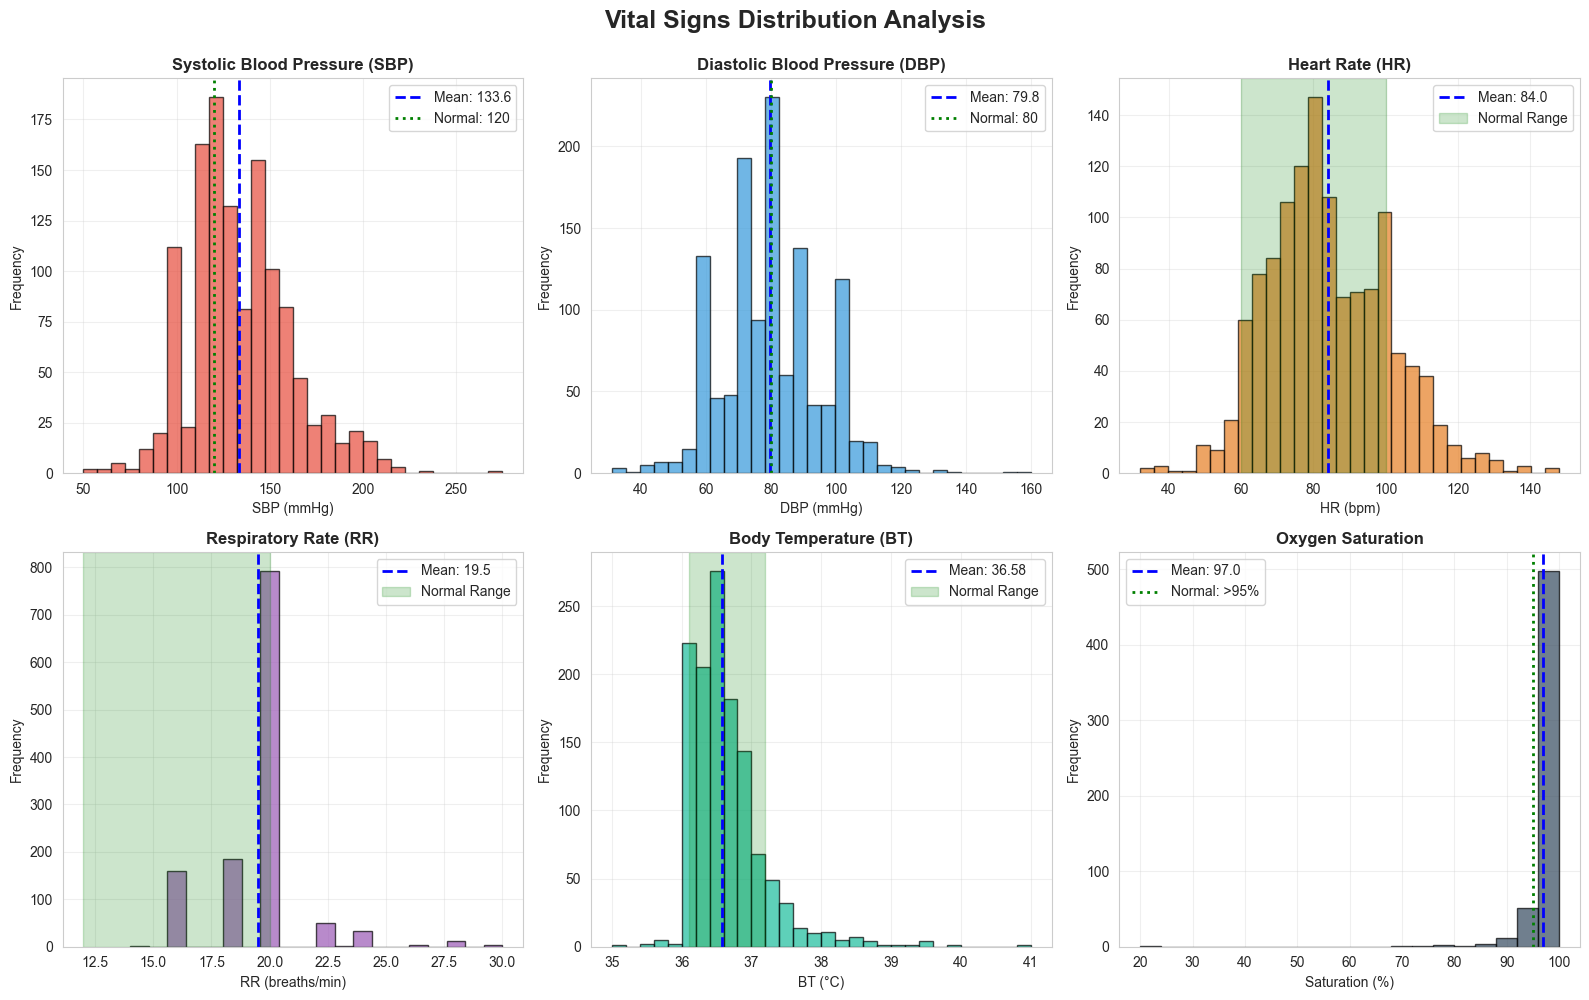


✓ Vital signs distributions saved as 'Images/vital_signs_distributions.png'

Vital Signs Summary:
----------------------------------------
SBP         : Mean=133.65, Std= 27.28, Range=[ 50.00, 275.00]
DBP         : Mean= 79.78, Std= 15.15, Range=[ 31.00, 160.00]
HR          : Mean= 83.96, Std= 16.64, Range=[ 32.00, 148.00]
RR          : Mean= 19.51, Std=  2.02, Range=[ 14.00,  30.00]
BT          : Mean= 36.58, Std=  0.55, Range=[ 35.00,  41.00]
Saturation  : Mean= 97.02, Std=  4.35, Range=[ 20.00, 100.00]


In [6]:
print("\n5. VITAL SIGNS ANALYSIS")
print("-"*80)

# Create comprehensive vital signs visualization
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Vital Signs Distribution Analysis', fontsize=18, fontweight='bold', y=0.995)

# Blood Pressure (Systolic)
axes[0, 0].hist(df['SBP'].dropna(), bins=30, color='#E74C3C', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['SBP'].mean(), color='blue', linestyle='--', linewidth=2, label=f'Mean: {df["SBP"].mean():.1f}')
axes[0, 0].axvline(120, color='green', linestyle=':', linewidth=2, label='Normal: 120')
axes[0, 0].set_title('Systolic Blood Pressure (SBP)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('SBP (mmHg)', fontsize=10)
axes[0, 0].set_ylabel('Frequency', fontsize=10)
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Blood Pressure (Diastolic)
axes[0, 1].hist(df['DBP'].dropna(), bins=30, color='#3498DB', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(df['DBP'].mean(), color='blue', linestyle='--', linewidth=2, label=f'Mean: {df["DBP"].mean():.1f}')
axes[0, 1].axvline(80, color='green', linestyle=':', linewidth=2, label='Normal: 80')
axes[0, 1].set_title('Diastolic Blood Pressure (DBP)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('DBP (mmHg)', fontsize=10)
axes[0, 1].set_ylabel('Frequency', fontsize=10)
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Heart Rate
axes[0, 2].hist(df['HR'].dropna(), bins=30, color='#E67E22', edgecolor='black', alpha=0.7)
axes[0, 2].axvline(df['HR'].mean(), color='blue', linestyle='--', linewidth=2, label=f'Mean: {df["HR"].mean():.1f}')
axes[0, 2].axvspan(60, 100, alpha=0.2, color='green', label='Normal Range')
axes[0, 2].set_title('Heart Rate (HR)', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('HR (bpm)', fontsize=10)
axes[0, 2].set_ylabel('Frequency', fontsize=10)
axes[0, 2].legend()
axes[0, 2].grid(alpha=0.3)

# Respiratory Rate
axes[1, 0].hist(df['RR'].dropna(), bins=20, color='#9B59B6', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(df['RR'].mean(), color='blue', linestyle='--', linewidth=2, label=f'Mean: {df["RR"].mean():.1f}')
axes[1, 0].axvspan(12, 20, alpha=0.2, color='green', label='Normal Range')
axes[1, 0].set_title('Respiratory Rate (RR)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('RR (breaths/min)', fontsize=10)
axes[1, 0].set_ylabel('Frequency', fontsize=10)
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Body Temperature
axes[1, 1].hist(df['BT'].dropna(), bins=30, color='#1ABC9C', edgecolor='black', alpha=0.7)
axes[1, 1].axvline(df['BT'].mean(), color='blue', linestyle='--', linewidth=2, label=f'Mean: {df["BT"].mean():.2f}')
axes[1, 1].axvspan(36.1, 37.2, alpha=0.2, color='green', label='Normal Range')
axes[1, 1].set_title('Body Temperature (BT)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('BT (°C)', fontsize=10)
axes[1, 1].set_ylabel('Frequency', fontsize=10)
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

# Oxygen Saturation
axes[1, 2].hist(df['Saturation'].dropna(), bins=20, color='#34495E', edgecolor='black', alpha=0.7)
axes[1, 2].axvline(df['Saturation'].mean(), color='blue', linestyle='--', linewidth=2, label=f'Mean: {df["Saturation"].mean():.1f}')
axes[1, 2].axvline(95, color='green', linestyle=':', linewidth=2, label='Normal: >95%')
axes[1, 2].set_title('Oxygen Saturation', fontsize=12, fontweight='bold')
axes[1, 2].set_xlabel('Saturation (%)', fontsize=10)
axes[1, 2].set_ylabel('Frequency', fontsize=10)
axes[1, 2].legend()
axes[1, 2].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('Images/vital_signs_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Vital signs distributions saved as 'Images/vital_signs_distributions.png'")

# Print summary statistics
print("\nVital Signs Summary:")
print("-"*40)
vital_signs = ['SBP', 'DBP', 'HR', 'RR', 'BT', 'Saturation']
for vs in vital_signs:
    if vs in df.columns:
        mean_val = df[vs].mean()
        std_val = df[vs].std()
        min_val = df[vs].min()
        max_val = df[vs].max()
        print(f"{vs:12s}: Mean={mean_val:6.2f}, Std={std_val:6.2f}, Range=[{min_val:6.2f}, {max_val:6.2f}]")


6. MISTRIAGE ANALYSIS
--------------------------------------------------------------------------------

6.1 Mistriage by KTAS Category
----------------------------------------
Mistriage_Label   Correct  Over-triage  Under-triage
KTAS_RN_Category                                    
Emergency           88.07         5.60          6.33
Non-Emergency       82.14        15.82          2.04

6.2 Mistriage by Age Groups
----------------------------------------
Mistriage_Label  Correct  Over-triage  Under-triage
Age_Group                                          
Young (≤30)        84.58        11.21          4.21
Adult (31-50)      87.16         7.09          5.74
Middle (51-70)     86.21         9.58          4.21
Senior (>70)       82.98        13.68          3.34


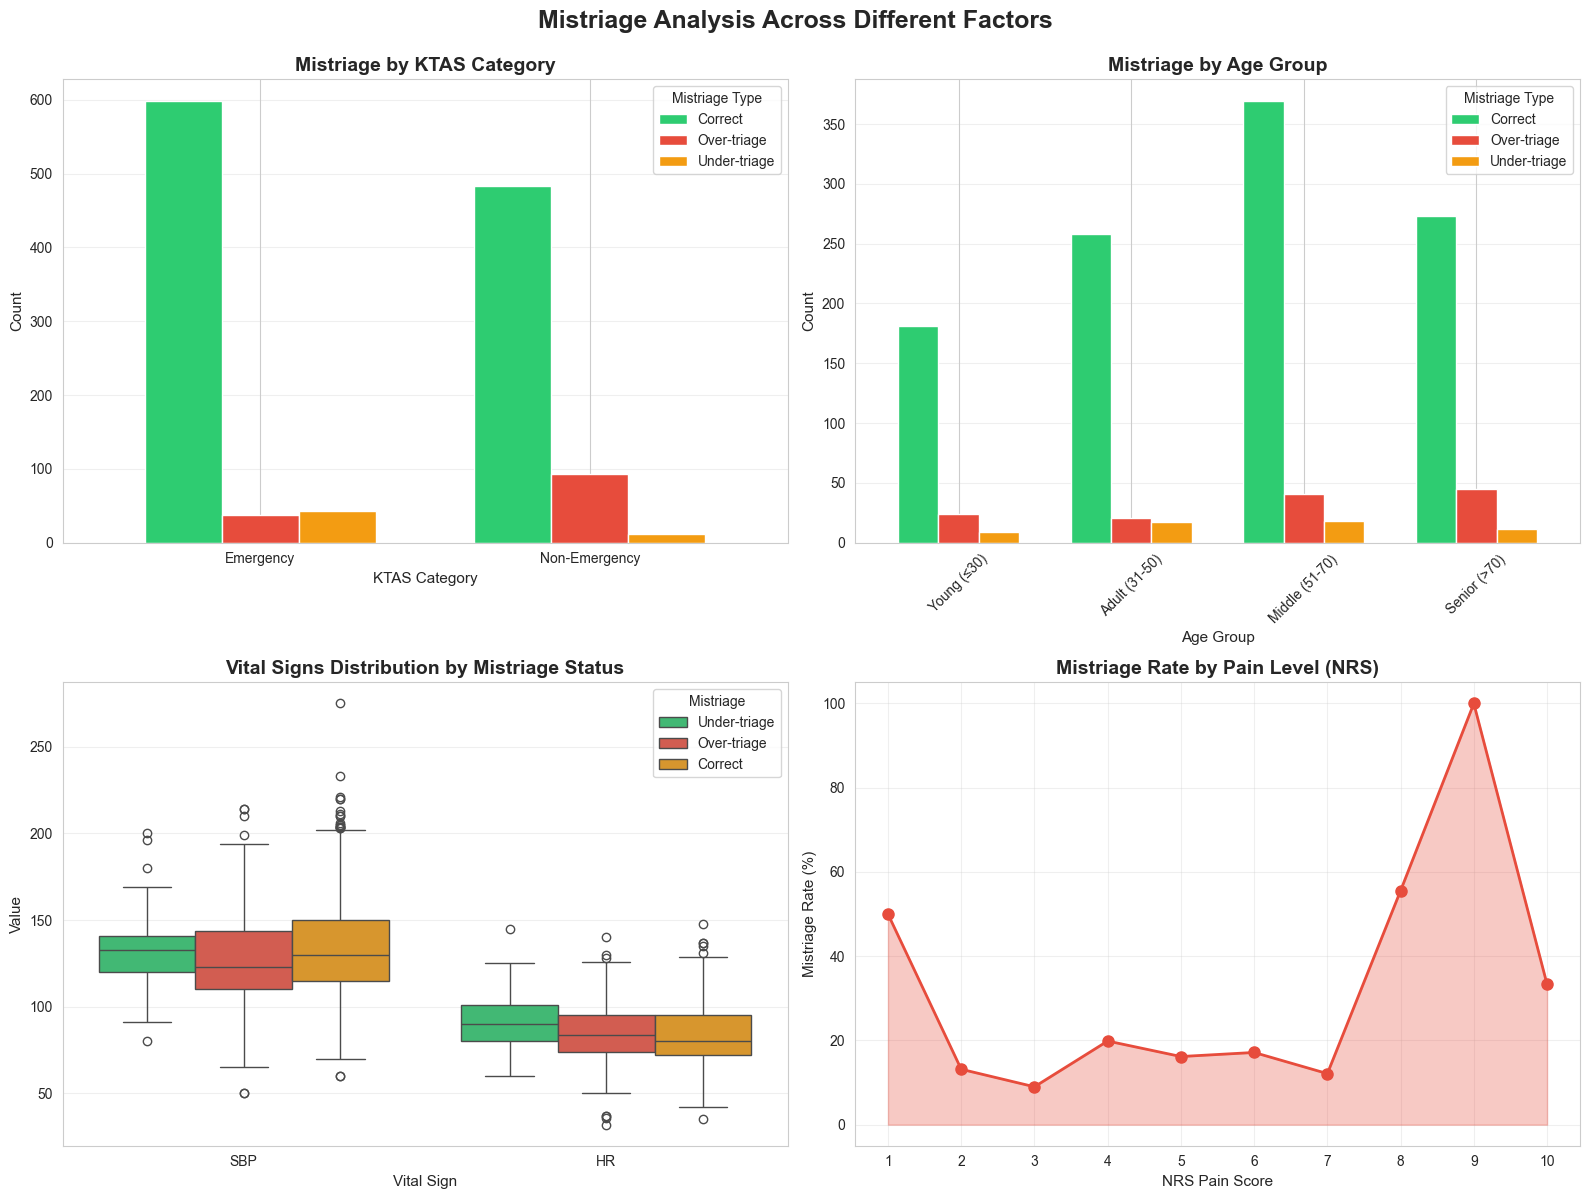


✓ Mistriage analysis visualization saved as 'Images/mistriage_analysis.png'

6.3 Key Findings:
----------------------------------------
• Overall Mistriage Rate: 14.68%
• Under-triage Rate: 4.34%
• Over-triage Rate: 10.34%


In [7]:
print("\n6. MISTRIAGE ANALYSIS")
print("-"*80)

# Analyze mistriage by different factors
print("\n6.1 Mistriage by KTAS Category")
print("-"*40)
mistriage_ktas = pd.crosstab(df['KTAS_RN_Category'], df['Mistriage_Label'], normalize='index') * 100
print(mistriage_ktas.round(2))

print("\n6.2 Mistriage by Age Groups")
print("-"*40)
# Create age groups
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 50, 70, 100], labels=['Young (≤30)', 'Adult (31-50)', 'Middle (51-70)', 'Senior (>70)'])
mistriage_age = pd.crosstab(df['Age_Group'], df['Mistriage_Label'], normalize='index') * 100
print(mistriage_age.round(2))

# Create comprehensive mistriage visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Mistriage Analysis Across Different Factors', fontsize=18, fontweight='bold', y=0.995)

# 1. Mistriage by KTAS Category
mistriage_ktas_counts = pd.crosstab(df['KTAS_RN_Category'], df['Mistriage_Label'])
mistriage_ktas_counts.plot(kind='bar', ax=axes[0, 0], color=['#2ECC71', '#E74C3C', '#F39C12'], width=0.7)
axes[0, 0].set_title('Mistriage by KTAS Category', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('KTAS Category', fontsize=11)
axes[0, 0].set_ylabel('Count', fontsize=11)
axes[0, 0].legend(title='Mistriage Type', loc='upper right')
axes[0, 0].tick_params(axis='x', rotation=0)
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Mistriage by Age Group
mistriage_age_counts = pd.crosstab(df['Age_Group'], df['Mistriage_Label'])
mistriage_age_counts.plot(kind='bar', ax=axes[0, 1], color=['#2ECC71', '#E74C3C', '#F39C12'], width=0.7)
axes[0, 1].set_title('Mistriage by Age Group', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Age Group', fontsize=11)
axes[0, 1].set_ylabel('Count', fontsize=11)
axes[0, 1].legend(title='Mistriage Type', loc='upper right')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Vital Signs by Mistriage Status - Boxplot
vital_data = df[['SBP', 'HR', 'Mistriage_Label']].dropna()
vital_melted = vital_data.melt(id_vars='Mistriage_Label', var_name='Vital Sign', value_name='Value')
sns.boxplot(data=vital_melted, x='Vital Sign', y='Value', hue='Mistriage_Label', 
            palette=['#2ECC71', '#E74C3C', '#F39C12'], ax=axes[1, 0])
axes[1, 0].set_title('Vital Signs Distribution by Mistriage Status', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Vital Sign', fontsize=11)
axes[1, 0].set_ylabel('Value', fontsize=11)
axes[1, 0].legend(title='Mistriage', loc='upper right')
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Mistriage Rate by Pain Level
pain_mistriage = df.groupby('NRS_pain')['mistriage'].apply(lambda x: (x > 0).sum() / len(x) * 100).reset_index()
pain_mistriage.columns = ['NRS_pain', 'Mistriage_Rate']
axes[1, 1].plot(pain_mistriage['NRS_pain'], pain_mistriage['Mistriage_Rate'], 
                marker='o', linewidth=2, markersize=8, color='#E74C3C')
axes[1, 1].fill_between(pain_mistriage['NRS_pain'], pain_mistriage['Mistriage_Rate'], alpha=0.3, color='#E74C3C')
axes[1, 1].set_title('Mistriage Rate by Pain Level (NRS)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('NRS Pain Score', fontsize=11)
axes[1, 1].set_ylabel('Mistriage Rate (%)', fontsize=11)
axes[1, 1].grid(alpha=0.3)
axes[1, 1].set_xticks(range(1, 11))

plt.tight_layout()
plt.savefig('Images/mistriage_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Mistriage analysis visualization saved as 'Images/mistriage_analysis.png'")

# Key findings
print("\n6.3 Key Findings:")
print("-"*40)
total_mistriage_rate = (df['mistriage'] > 0).sum() / len(df) * 100
print(f"• Overall Mistriage Rate: {total_mistriage_rate:.2f}%")
print(f"• Under-triage Rate: {(df['mistriage'] == 1).sum() / len(df) * 100:.2f}%")
print(f"• Over-triage Rate: {(df['mistriage'] == 2).sum() / len(df) * 100:.2f}%")


7. CORRELATION ANALYSIS
--------------------------------------------------------------------------------


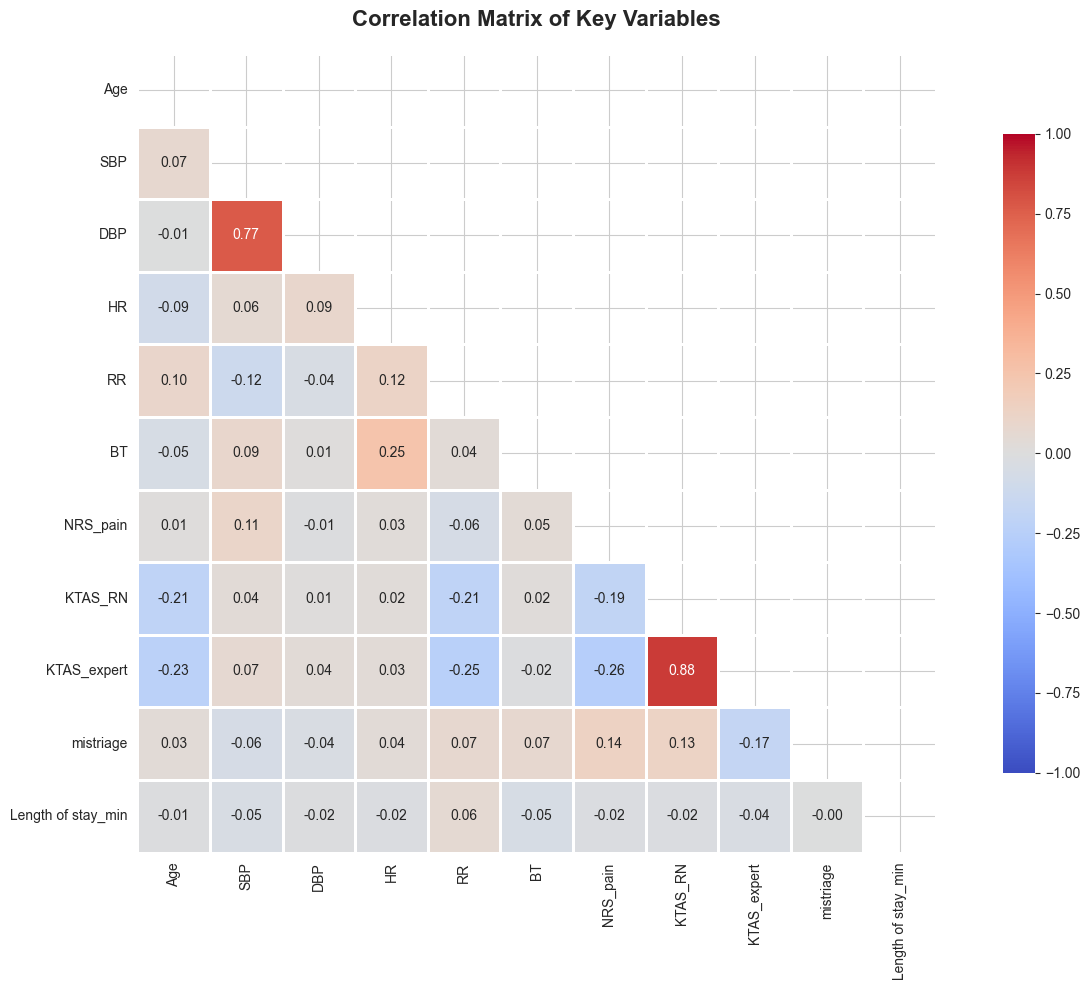


✓ Correlation matrix saved as 'Images/correlation_matrix.png'

7.1 Strongest Correlations with Mistriage:
----------------------------------------
NRS_pain              0.138650
KTAS_RN               0.130169
BT                    0.074562
RR                    0.072524
HR                    0.038035
Age                   0.033186
Length of stay_min   -0.000695
DBP                  -0.038271
SBP                  -0.060366
KTAS_expert          -0.172193
Name: mistriage, dtype: float64

7.2 Strongest Correlations with KTAS_RN:
----------------------------------------
KTAS_expert           0.878191
mistriage             0.130169
SBP                   0.037946
HR                    0.024530
BT                    0.015885
DBP                   0.008161
Length of stay_min   -0.019822
NRS_pain             -0.188929
Age                  -0.207967
RR                   -0.209512
Name: KTAS_RN, dtype: float64

7.3 Highly Correlated Variable Pairs (|r| > 0.5):
------------------------------------

In [8]:
print("\n7. CORRELATION ANALYSIS")
print("-"*80)

# Select numerical features for correlation
correlation_features = ['Age', 'SBP', 'DBP', 'HR', 'RR', 'BT', 'NRS_pain', 
                        'KTAS_RN', 'KTAS_expert', 'mistriage', 'Length of stay_min']

# Create correlation matrix
corr_df = df[correlation_features].corr()

# Create correlation heatmap
fig, ax = plt.subplots(figsize=(14, 10))
mask = np.triu(np.ones_like(corr_df, dtype=bool))
sns.heatmap(corr_df, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, ax=ax)
ax.set_title('Correlation Matrix of Key Variables', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('Images/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Correlation matrix saved as 'Images/correlation_matrix.png'")

# Print strongest correlations with mistriage
print("\n7.1 Strongest Correlations with Mistriage:")
print("-"*40)
mistriage_corr = corr_df['mistriage'].sort_values(ascending=False)
print(mistriage_corr[mistriage_corr.index != 'mistriage'])

# Print strongest correlations with KTAS
print("\n7.2 Strongest Correlations with KTAS_RN:")
print("-"*40)
ktas_corr = corr_df['KTAS_RN'].sort_values(ascending=False)
print(ktas_corr[ktas_corr.index != 'KTAS_RN'])

# Identify highly correlated pairs
print("\n7.3 Highly Correlated Variable Pairs (|r| > 0.5):")
print("-"*40)
high_corr = []
for i in range(len(corr_df.columns)):
    for j in range(i+1, len(corr_df.columns)):
        if abs(corr_df.iloc[i, j]) > 0.5:
            high_corr.append((corr_df.columns[i], corr_df.columns[j], corr_df.iloc[i, j]))

for var1, var2, corr_val in sorted(high_corr, key=lambda x: abs(x[2]), reverse=True):
    print(f"• {var1:20s} ↔ {var2:20s}: {corr_val:6.3f}")


8. BIVARIATE ANALYSIS - RELATIONSHIPS BETWEEN VARIABLES
--------------------------------------------------------------------------------


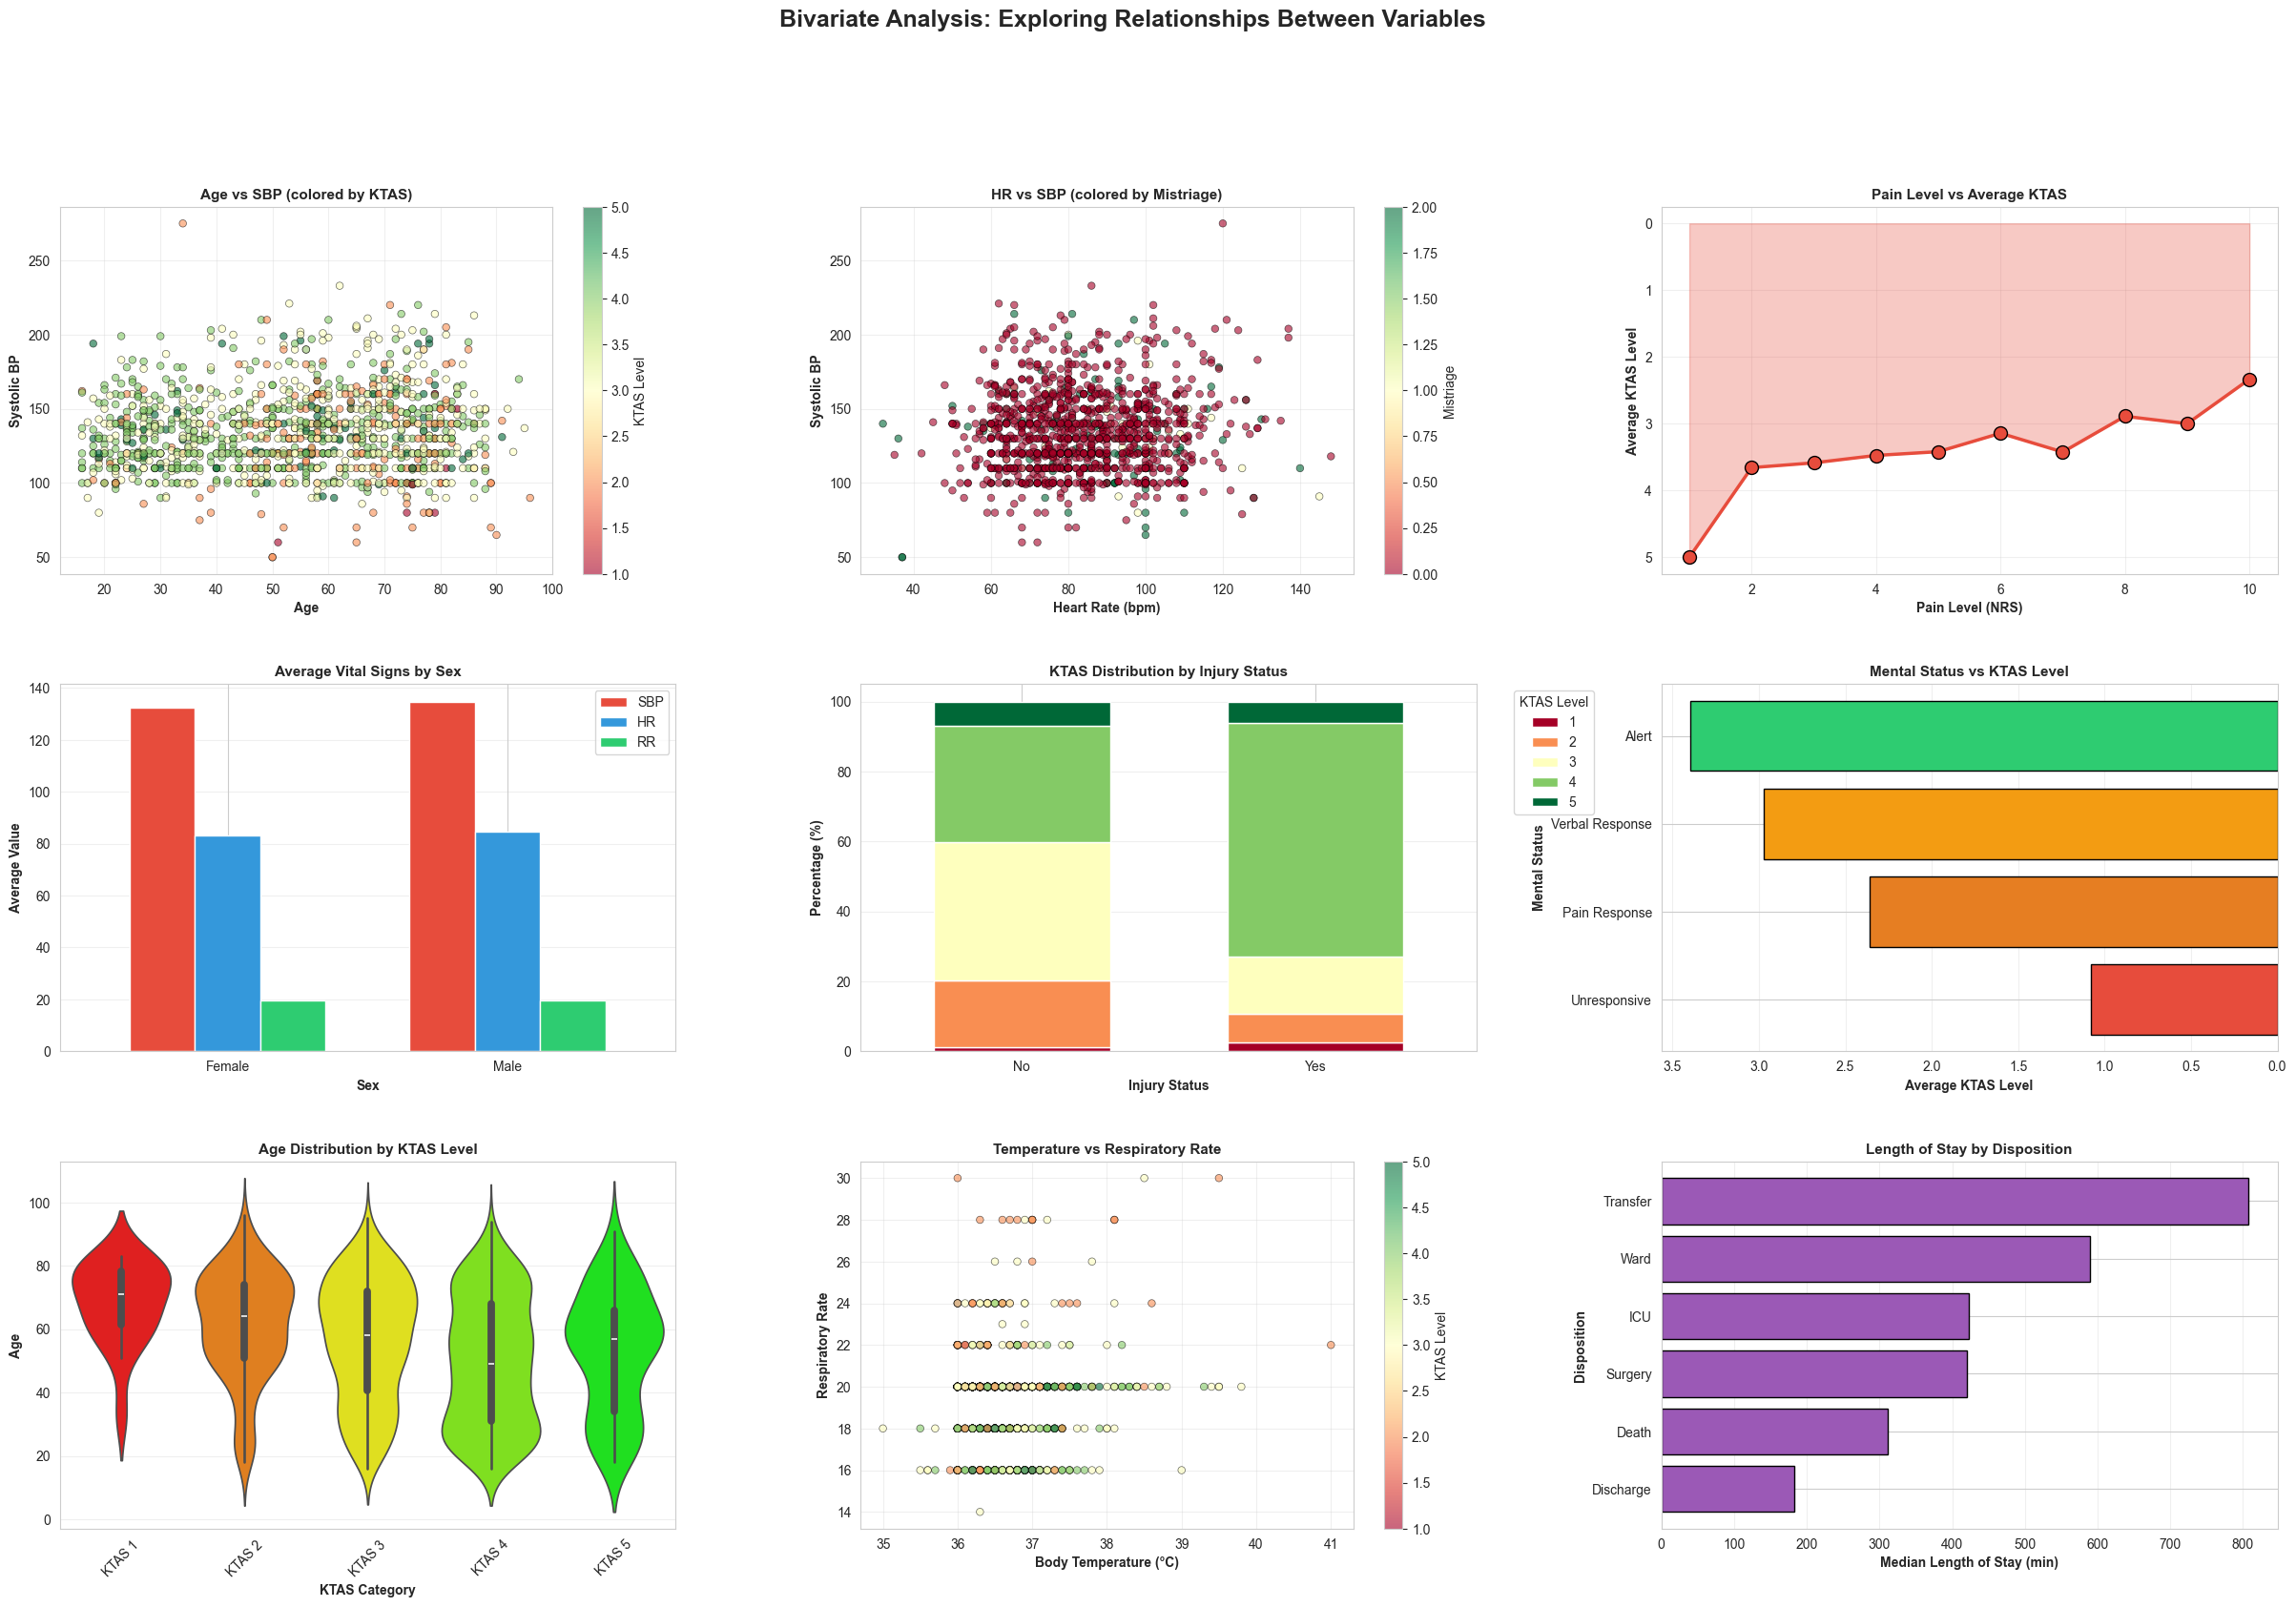


✓ Bivariate analysis visualization saved as 'Images/bivariate_analysis.png'


In [9]:
print("\n8. BIVARIATE ANALYSIS - RELATIONSHIPS BETWEEN VARIABLES")
print("-"*80)

# Create comprehensive bivariate analysis
fig = plt.figure(figsize=(30, 18))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Age vs Vital Signs Scatter
ax1 = fig.add_subplot(gs[0, 0])
scatter1 = ax1.scatter(df['Age'], df['SBP'], c=df['KTAS_RN'], cmap='RdYlGn', 
                       alpha=0.6, s=30, edgecolors='black', linewidth=0.5)
ax1.set_xlabel('Age', fontsize=10, fontweight='bold')
ax1.set_ylabel('Systolic BP', fontsize=10, fontweight='bold')
ax1.set_title('Age vs SBP (colored by KTAS)', fontsize=11, fontweight='bold')
plt.colorbar(scatter1, ax=ax1, label='KTAS Level')
ax1.grid(alpha=0.3)

# 2. Heart Rate vs Blood Pressure
ax2 = fig.add_subplot(gs[0, 1])
scatter2 = ax2.scatter(df['HR'], df['SBP'], c=df['mistriage'], cmap='RdYlGn', 
                       alpha=0.6, s=30, edgecolors='black', linewidth=0.5)
ax2.set_xlabel('Heart Rate (bpm)', fontsize=10, fontweight='bold')
ax2.set_ylabel('Systolic BP', fontsize=10, fontweight='bold')
ax2.set_title('HR vs SBP (colored by Mistriage)', fontsize=11, fontweight='bold')
plt.colorbar(scatter2, ax=ax2, label='Mistriage')
ax2.grid(alpha=0.3)

# 3. Pain Level vs KTAS
ax3 = fig.add_subplot(gs[0, 2])
pain_ktas = df.groupby('NRS_pain')['KTAS_RN'].mean()
ax3.plot(pain_ktas.index, pain_ktas.values, marker='o', linewidth=2.5, 
         markersize=10, color='#E74C3C', markeredgecolor='black', markeredgewidth=1)
ax3.fill_between(pain_ktas.index, pain_ktas.values, alpha=0.3, color='#E74C3C')
ax3.set_xlabel('Pain Level (NRS)', fontsize=10, fontweight='bold')
ax3.set_ylabel('Average KTAS Level', fontsize=10, fontweight='bold')
ax3.set_title('Pain Level vs Average KTAS', fontsize=11, fontweight='bold')
ax3.grid(alpha=0.3)
ax3.invert_yaxis()

# 4. Sex vs Vital Signs
ax4 = fig.add_subplot(gs[1, 0])
sex_vital = df.groupby('Sex_Label')[['SBP', 'HR', 'RR']].mean()
sex_vital.plot(kind='bar', ax=ax4, color=['#E74C3C', '#3498DB', '#2ECC71'], width=0.7)
ax4.set_xlabel('Sex', fontsize=10, fontweight='bold')
ax4.set_ylabel('Average Value', fontsize=10, fontweight='bold')
ax4.set_title('Average Vital Signs by Sex', fontsize=11, fontweight='bold')
ax4.tick_params(axis='x', rotation=0)
ax4.legend(loc='upper right')
ax4.grid(axis='y', alpha=0.3)

# 5. Injury Status vs KTAS
ax5 = fig.add_subplot(gs[1, 1])
injury_ktas = pd.crosstab(df['Injury_Label'], df['KTAS_RN'], normalize='index') * 100
injury_ktas.plot(kind='bar', stacked=True, ax=ax5, colormap='RdYlGn', width=0.6)
ax5.set_xlabel('Injury Status', fontsize=10, fontweight='bold')
ax5.set_ylabel('Percentage (%)', fontsize=10, fontweight='bold')
ax5.set_title('KTAS Distribution by Injury Status', fontsize=11, fontweight='bold')
ax5.tick_params(axis='x', rotation=0)
ax5.legend(title='KTAS Level', bbox_to_anchor=(1.05, 1), loc='upper left')
ax5.grid(axis='y', alpha=0.3)

# 6. Mental Status vs KTAS
ax6 = fig.add_subplot(gs[1, 2])
mental_ktas = df.groupby('Mental_Label')['KTAS_RN'].mean().sort_values()
colors_mental = ['#E74C3C','#E67E22','#F39C12','#2ECC71']
ax6.barh(mental_ktas.index, mental_ktas.values, color=colors_mental, edgecolor='black', linewidth=1)
ax6.set_xlabel('Average KTAS Level', fontsize=10, fontweight='bold')
ax6.set_ylabel('Mental Status', fontsize=10, fontweight='bold')
ax6.set_title('Mental Status vs KTAS Level', fontsize=11, fontweight='bold')
ax6.invert_xaxis()
ax6.grid(axis='x', alpha=0.3)

# 7. Age Distribution by KTAS Category
ax7 = fig.add_subplot(gs[2, 0])
df_plot = df[['Age', 'KTAS_RN']].copy()
df_plot['KTAS_Category'] = df_plot['KTAS_RN'].apply(lambda x: f'KTAS {x}') # Create ordered categories
ktas_order = [f'KTAS {i}' for i in range(1, 6)] # Order KTAS from 1 to 5
colors = ['#ff0000', '#ff7f00', '#ffff00','#7fff00', '#00ff00']  # green -> yellow -> red
sns.violinplot(data=df_plot, x='KTAS_Category', y='Age', 
               order=ktas_order, palette=colors, ax=ax7)
ax7.set_xlabel('KTAS Category', fontsize=10, fontweight='bold')
ax7.set_ylabel('Age', fontsize=10, fontweight='bold')
ax7.set_title('Age Distribution by KTAS Level', fontsize=11, fontweight='bold')
ax7.tick_params(axis='x', rotation=45)
ax7.grid(axis='y', alpha=0.3)

# 8. Temperature vs Respiratory Rate
ax8 = fig.add_subplot(gs[2, 1])
scatter3 = ax8.scatter(df['BT'], df['RR'], c=df['KTAS_RN'], cmap='RdYlGn', 
                       alpha=0.6, s=30, edgecolors='black', linewidth=0.5)
ax8.set_xlabel('Body Temperature (°C)', fontsize=10, fontweight='bold')
ax8.set_ylabel('Respiratory Rate', fontsize=10, fontweight='bold')
ax8.set_title('Temperature vs Respiratory Rate', fontsize=11, fontweight='bold')
plt.colorbar(scatter3, ax=ax8, label='KTAS Level')
ax8.grid(alpha=0.3)

# 9. Length of Stay by Disposition
ax9 = fig.add_subplot(gs[2, 2])
disposition_map = {1: 'Discharge', 2: 'Ward', 3: 'ICU', 4: 'Discharge', 5: 'Transfer', 6: 'Death', 7: 'Surgery'}
df['Disposition_Label'] = df['Disposition'].map(disposition_map)
los_disp = df.groupby('Disposition_Label')['Length of stay_min'].median().sort_values()
ax9.barh(los_disp.index, los_disp.values, color='#9B59B6', edgecolor='black', linewidth=1)
ax9.set_xlabel('Median Length of Stay (min)', fontsize=10, fontweight='bold')
ax9.set_ylabel('Disposition', fontsize=10, fontweight='bold')
ax9.set_title('Length of Stay by Disposition', fontsize=11, fontweight='bold')
ax9.grid(axis='x', alpha=0.3)

fig.suptitle('Bivariate Analysis: Exploring Relationships Between Variables', 
             fontsize=18, fontweight='bold', y=0.995)

plt.savefig('Images/bivariate_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Bivariate analysis visualization saved as 'Images/bivariate_analysis.png'")


9. ADVANCED INSIGHTS & PATTERNS
--------------------------------------------------------------------------------


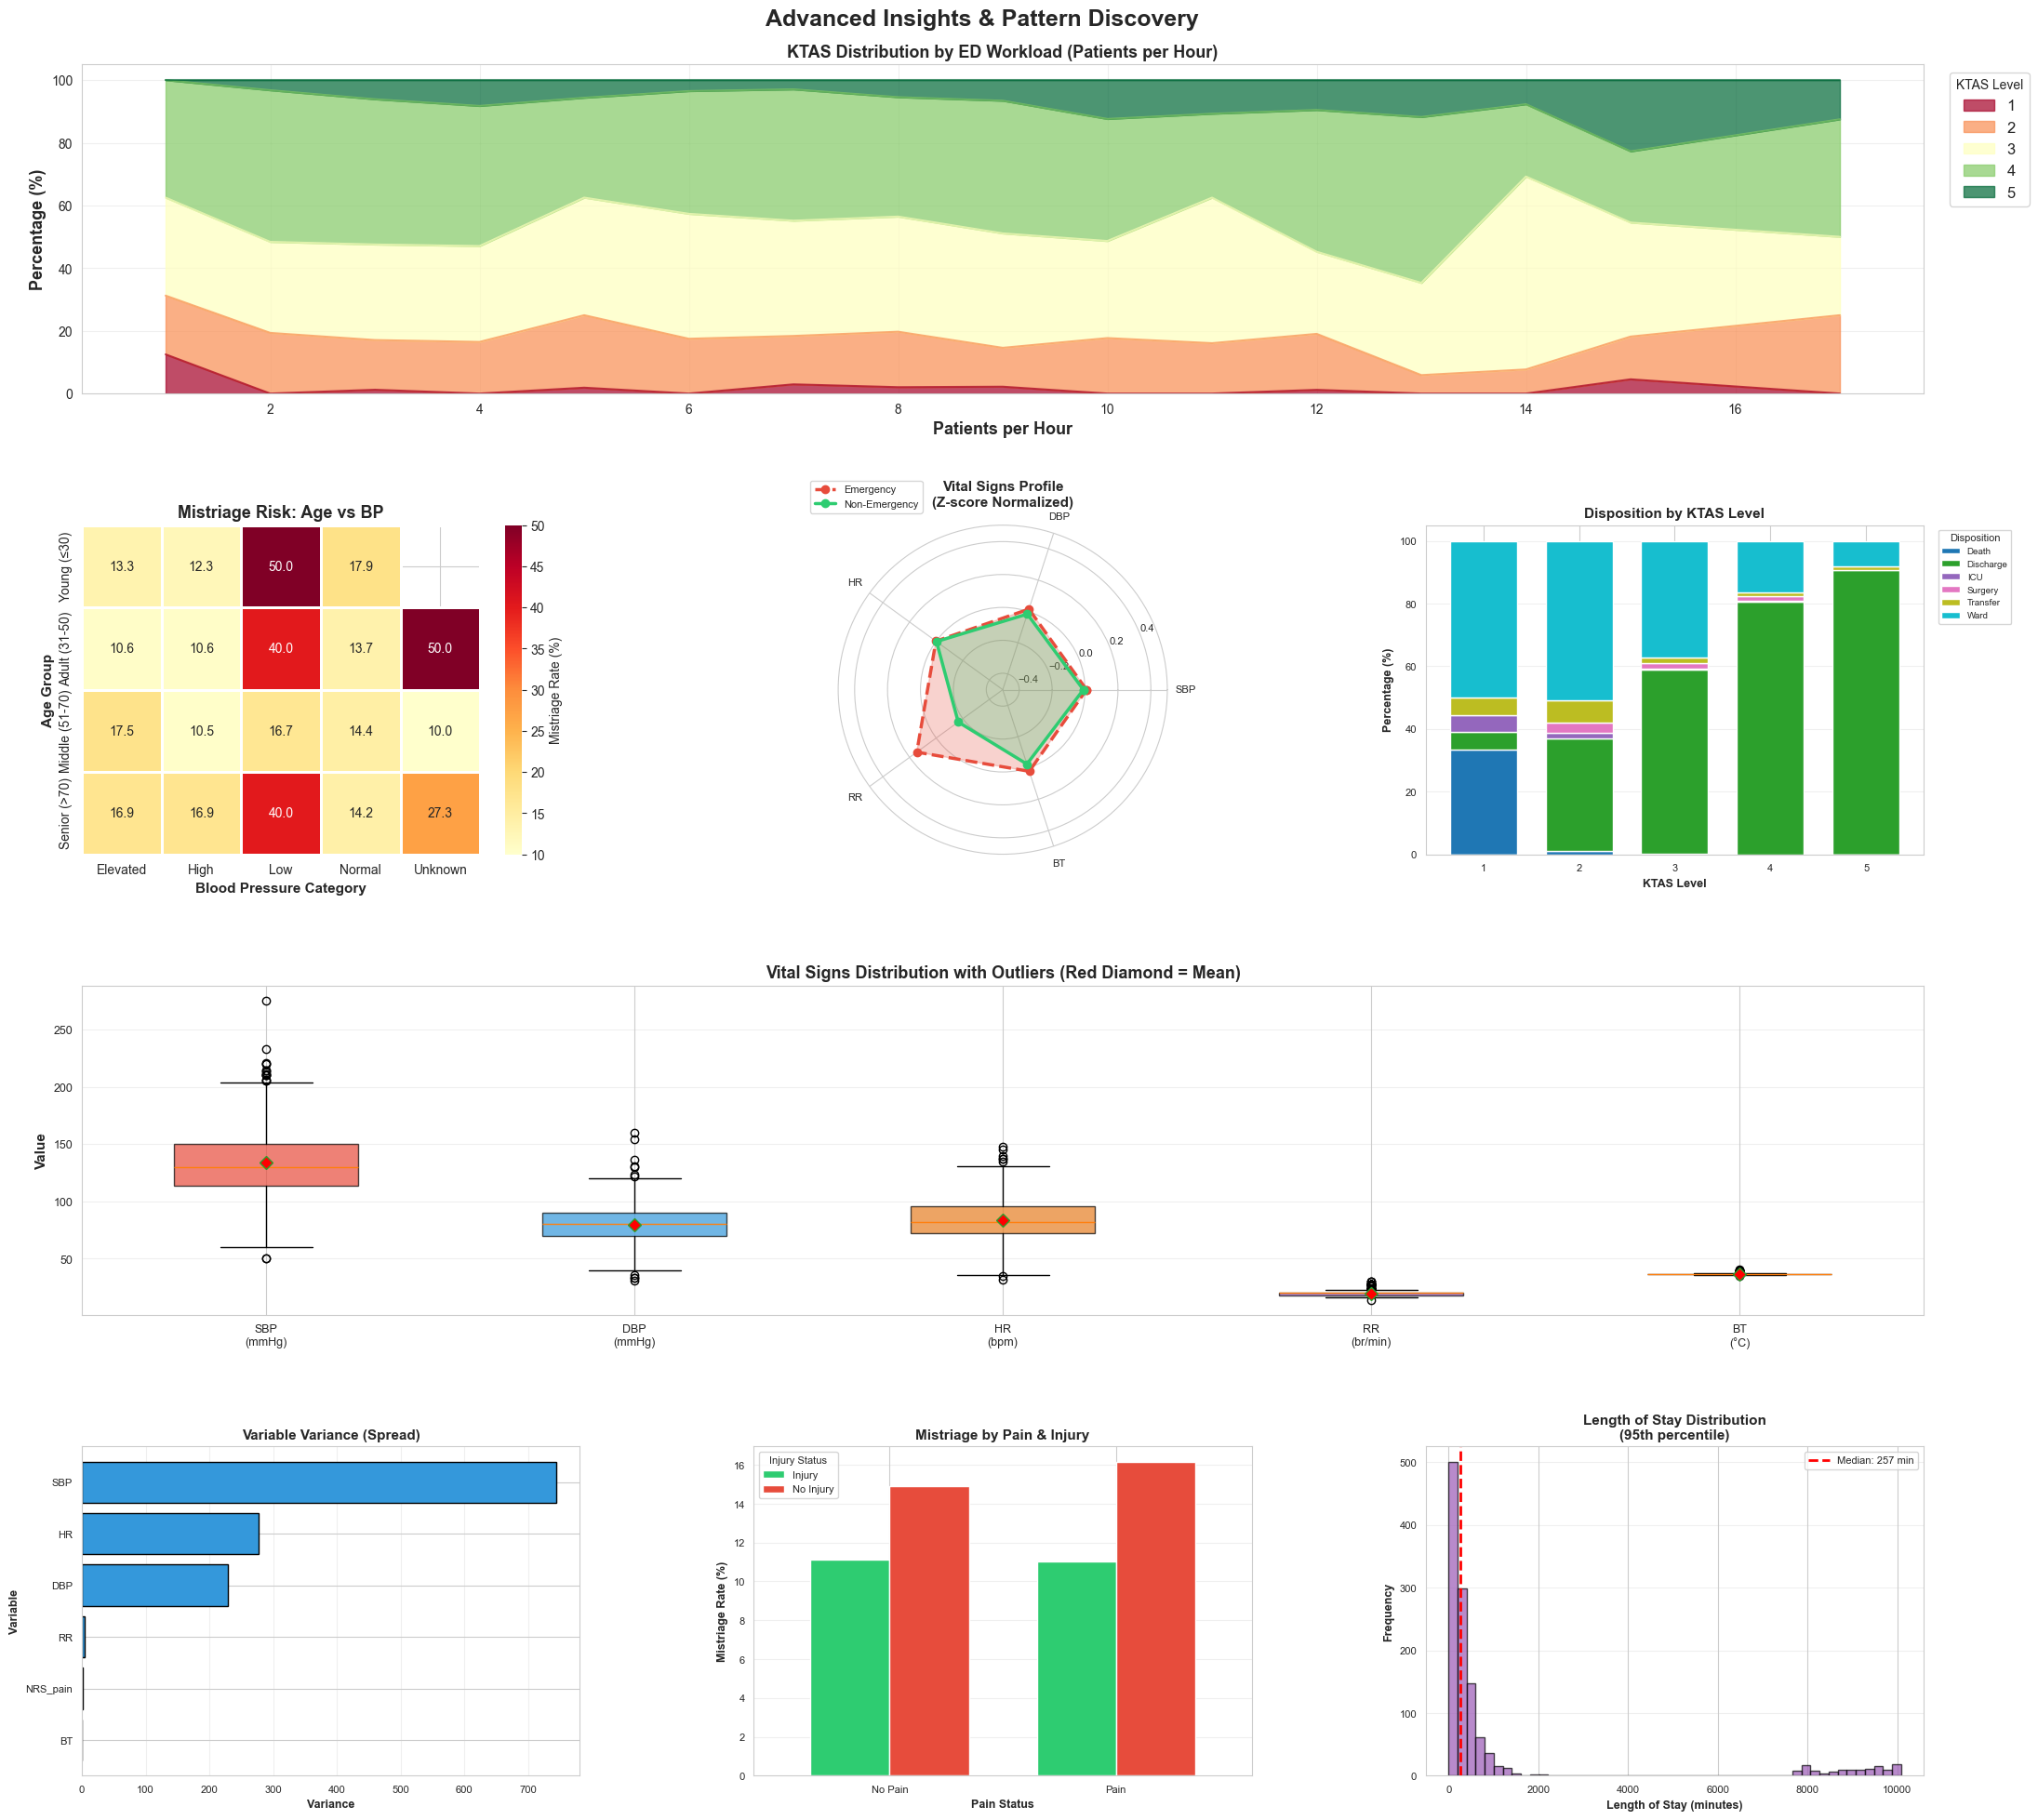


✓ Advanced insights visualization saved as 'Images/advanced_insights.png'

9.1 Key Insights Discovered:
----------------------------------------
• Average Length of Stay: 11016 minutes
• Median Length of Stay: 274 minutes
• Emergency Cases (KTAS 1-3): 679 (53.6%)
• Non-Emergency Cases (KTAS 4-5): 588 (46.4%)
• Patients with Pain: 714 (56.4%)
• Patients with Injury: 244 (19.3%)


In [10]:
print("\n9. ADVANCED INSIGHTS & PATTERNS")
print("-"*80)

# Create age groups for analysis
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 50, 70, 100], 
                         labels=['Young (≤30)', 'Adult (31-50)', 'Middle (51-70)', 'Senior (>70)'])

# Create BP categories
def categorize_bp(sbp):
    if pd.isna(sbp):
        return 'Unknown'
    elif sbp < 90:
        return 'Low'
    elif sbp <= 120:
        return 'Normal'
    elif sbp <= 140:
        return 'Elevated'
    else:
        return 'High'

df['BP_Category'] = df['SBP'].apply(categorize_bp)

# Create comprehensive insights visualization
fig = plt.figure(figsize=(22, 20))
gs = fig.add_gridspec(4, 3, hspace=0.4, wspace=0.35, top=0.96, bottom=0.04, left=0.06, right=0.96)

# 1. KTAS Distribution Over Time (by hour of arrival)
ax1 = fig.add_subplot(gs[0, :])
# Since we don't have time data, we'll show KTAS distribution by patient number per hour
ktas_by_hour = df.groupby('Patients number per hour')['KTAS_RN'].value_counts(normalize=True).unstack(fill_value=0) * 100
ktas_by_hour.plot(kind='area', stacked=True, ax=ax1, colormap='RdYlGn', alpha=0.7)
ax1.set_xlabel('Patients per Hour', fontsize=13, fontweight='bold')
ax1.set_ylabel('Percentage (%)', fontsize=13, fontweight='bold')
ax1.set_title('KTAS Distribution by ED Workload (Patients per Hour)', fontsize=13, fontweight='bold')
ax1.legend(title='KTAS Level', bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=12)
ax1.grid(alpha=0.3)

# 2. Risk Score Heatmap (Age Group vs BP Category)
ax2 = fig.add_subplot(gs[1, 0])
risk_matrix = pd.crosstab(df['Age_Group'], df['BP_Category'], 
                          values=df['mistriage'], aggfunc=lambda x: (x > 0).sum() / len(x) * 100)
sns.heatmap(risk_matrix, annot=True, fmt='.1f', cmap='YlOrRd', ax=ax2, 
            cbar_kws={'label': 'Mistriage Rate (%)'}, linewidths=1, linecolor='white')
ax2.set_title('Mistriage Risk: Age vs BP', fontsize=13, fontweight='bold')
ax2.set_xlabel('Blood Pressure Category', fontsize=11, fontweight='bold')
ax2.set_ylabel('Age Group', fontsize=11, fontweight='bold')
ax2.tick_params(axis='both', labelsize=10)

# 3. Vital Signs Radar Chart Comparison
# Split into Emergency vs Non-Emergency
emergency_df = df[df['KTAS_RN'] <= 3]
non_emergency_df = df[df['KTAS_RN'] > 3]

categories = ['SBP', 'DBP', 'HR', 'RR', 'BT']

# Z-score normalize each vital sign column across all patients
df_scaled = df.copy()
scaler = StandardScaler()
df_scaled[categories] = scaler.fit_transform(df_scaled[categories])

# Re-split into emergency vs non-emergency on the scaled data
emergency_scaled_df = df_scaled[df_scaled['KTAS_RN'] <= 3]
non_emergency_scaled_df = df_scaled[df_scaled['KTAS_RN'] > 3]

# Calculate means for each group
emergency_means = [emergency_scaled_df[cat].mean() for cat in categories]
non_emergency_means = [non_emergency_scaled_df[cat].mean() for cat in categories]

# Setup angles for radar chart
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

# Close the polygon by repeating first value
emergency_vals = emergency_means + [emergency_means[0]]
non_emergency_vals = non_emergency_means + [non_emergency_means[0]]

# Create radar chart
ax3 = fig.add_subplot(gs[1, 1], projection='polar')
ax3.plot(angles, emergency_vals, 'o--', linewidth=2.5, label='Emergency', color='#E74C3C')
ax3.fill(angles, emergency_vals, alpha=0.25, color='#E74C3C')
ax3.plot(angles, non_emergency_vals, 'o-', linewidth=2.5, label='Non-Emergency', color='#2ECC71')
ax3.fill(angles, non_emergency_vals, alpha=0.25, color='#2ECC71')

ax3.set_xticks(angles[:-1])
ax3.set_xticklabels(categories, fontsize=9)
ax3.set_title('Vital Signs Profile\n(Z-score Normalized)', fontsize=11, fontweight='bold', pad=15)
ax3.legend(loc='upper left', bbox_to_anchor=(-0.1, 1.15), fontsize=8, frameon=True)
ax3.grid(True)
ax3.set_ylim(-0.5, 0.5)
ax3.tick_params(labelsize=8)

# 4. Disposition Outcomes by KTAS
ax4 = fig.add_subplot(gs[1, 2])
disposition_map = {1: 'Discharge', 2: 'Ward', 3: 'ICU', 4: 'Discharge', 5: 'Transfer', 6: 'Death', 7: 'Surgery'}
df['Disposition_Label'] = df['Disposition'].map(disposition_map)
disp_ktas = pd.crosstab(df['KTAS_RN'], df['Disposition_Label'], normalize='index') * 100
disp_ktas.plot(kind='bar', stacked=True, ax=ax4, colormap='tab10', width=0.7)
ax4.set_xlabel('KTAS Level', fontsize=9, fontweight='bold')
ax4.set_ylabel('Percentage (%)', fontsize=9, fontweight='bold')
ax4.set_title('Disposition by KTAS Level', fontsize=11, fontweight='bold')
ax4.tick_params(axis='x', rotation=0, labelsize=8)
ax4.tick_params(axis='y', labelsize=8)
ax4.legend(title='Disposition', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=7, title_fontsize=8)
ax4.grid(axis='y', alpha=0.3)

# 5. Outlier Detection - Box plots for vital signs
ax5 = fig.add_subplot(gs[2, :])
vital_signs_data = df[['SBP', 'DBP', 'HR', 'RR', 'BT']].copy()
vital_signs_data.columns = ['SBP\n(mmHg)', 'DBP\n(mmHg)', 'HR\n(bpm)', 'RR\n(br/min)', 'BT\n(°C)']
bp = ax5.boxplot([vital_signs_data[col].dropna() for col in vital_signs_data.columns],
                  labels=vital_signs_data.columns, patch_artist=True, showmeans=True,
                  meanprops=dict(marker='D', markerfacecolor='red', markersize=7))
colors = ['#E74C3C', '#3498DB', '#E67E22', '#9B59B6', '#1ABC9C']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax5.set_ylabel('Value', fontsize=11, fontweight='bold')
ax5.set_title('Vital Signs Distribution with Outliers (Red Diamond = Mean)', fontsize=13, fontweight='bold')
ax5.tick_params(axis='both', labelsize=9)
ax5.grid(axis='y', alpha=0.3)

# 6. Feature Importance Proxy - Variance Analysis
ax6 = fig.add_subplot(gs[3, 0])
variance_data = df[['SBP', 'DBP', 'HR', 'RR', 'BT', 'NRS_pain']].var().sort_values(ascending=True)
ax6.barh(variance_data.index, variance_data.values, color='#3498DB', edgecolor='black', linewidth=1)
ax6.set_xlabel('Variance', fontsize=9, fontweight='bold')
ax6.set_ylabel('Variable', fontsize=9, fontweight='bold')
ax6.set_title('Variable Variance (Spread)', fontsize=11, fontweight='bold')
ax6.tick_params(axis='both', labelsize=8)
ax6.grid(axis='x', alpha=0.3)

# 7. Mistriage Patterns by Multiple Factors
ax7 = fig.add_subplot(gs[3, 1])
df['Pain_Label'] = df['Pain'].map({0: 'No Pain', 1: 'Pain'})
df['Injury_Label'] = df['Injury'].map({1: 'No Injury', 2: 'Injury'})
mistriage_patterns = df.groupby(['Pain_Label', 'Injury_Label'])['mistriage'].apply(
    lambda x: (x > 0).sum() / len(x) * 100).unstack()
mistriage_patterns.plot(kind='bar', ax=ax7, color=['#2ECC71', '#E74C3C'], width=0.7)
ax7.set_xlabel('Pain Status', fontsize=9, fontweight='bold')
ax7.set_ylabel('Mistriage Rate (%)', fontsize=9, fontweight='bold')
ax7.set_title('Mistriage by Pain & Injury', fontsize=11, fontweight='bold')
ax7.tick_params(axis='x', rotation=0, labelsize=8)
ax7.tick_params(axis='y', labelsize=8)
ax7.legend(title='Injury Status', fontsize=8, title_fontsize=8)
ax7.grid(axis='y', alpha=0.3)

# 8. Length of Stay Distribution
ax8 = fig.add_subplot(gs[3, 2])
# Filter extreme outliers for better visualization
los_filtered = df[df['Length of stay_min'] < df['Length of stay_min'].quantile(0.95)]
ax8.hist(los_filtered['Length of stay_min'], bins=50, color='#9B59B6', edgecolor='black', alpha=0.7)
ax8.axvline(los_filtered['Length of stay_min'].median(), color='red', linestyle='--', 
            linewidth=2, label=f'Median: {los_filtered["Length of stay_min"].median():.0f} min')
ax8.set_xlabel('Length of Stay (minutes)', fontsize=9, fontweight='bold')
ax8.set_ylabel('Frequency', fontsize=9, fontweight='bold')
ax8.set_title('Length of Stay Distribution\n(95th percentile)', fontsize=11, fontweight='bold')
ax8.tick_params(axis='both', labelsize=8)
ax8.legend(fontsize=8)
ax8.grid(axis='y', alpha=0.3)

fig.suptitle('Advanced Insights & Pattern Discovery', fontsize=18, fontweight='bold', y=0.99)

plt.savefig('Images/advanced_insights.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Advanced insights visualization saved as 'Images/advanced_insights.png'")

# Print key insights
print("\n9.1 Key Insights Discovered:")
print("-"*40)
print(f"• Average Length of Stay: {df['Length of stay_min'].mean():.0f} minutes")
print(f"• Median Length of Stay: {df['Length of stay_min'].median():.0f} minutes")
print(f"• Emergency Cases (KTAS 1-3): {(df['KTAS_RN'] <= 3).sum()} ({(df['KTAS_RN'] <= 3).sum()/len(df)*100:.1f}%)")
print(f"• Non-Emergency Cases (KTAS 4-5): {(df['KTAS_RN'] > 3).sum()} ({(df['KTAS_RN'] > 3).sum()/len(df)*100:.1f}%)")
print(f"• Patients with Pain: {(df['Pain'] == 1).sum()} ({(df['Pain'] == 1).sum()/len(df)*100:.1f}%)")
print(f"• Patients with Injury: {(df['Injury'] == 2).sum()} ({(df['Injury'] == 2).sum()/len(df)*100:.1f}%)")


10. MACHINE LEARNING RECOMMENDATIONS

10.1 Feature Engineering Opportunities
--------------------------------------------------------------------------------

✓ Creating Enhanced Features:
  1. Vital_Risk_Score: Composite score based on abnormal vital signs
  2. Age_Risk: Categorized age groups (Pediatric, Adult, Geriatric)
  3. Pulse_Pressure: Difference between SBP and DBP
  4. Shock_Index: HR/SBP ratio (indicator of shock)
  5. Pain_Injury_Interaction: Combined pain and injury indicator
  6. High_Workload: Binary indicator of ED workload

10.2 Feature Importance Analysis
--------------------------------------------------------------------------------

New Feature Correlations with Mistriage:
  • Shock_Index                   : 0.0904
  • Pulse_Pressure                : 0.0548
  • Vital_Risk_Score              : 0.0431
  • Pain_Injury_Interaction       : 0.0267
  • High_Workload                 : 0.0141


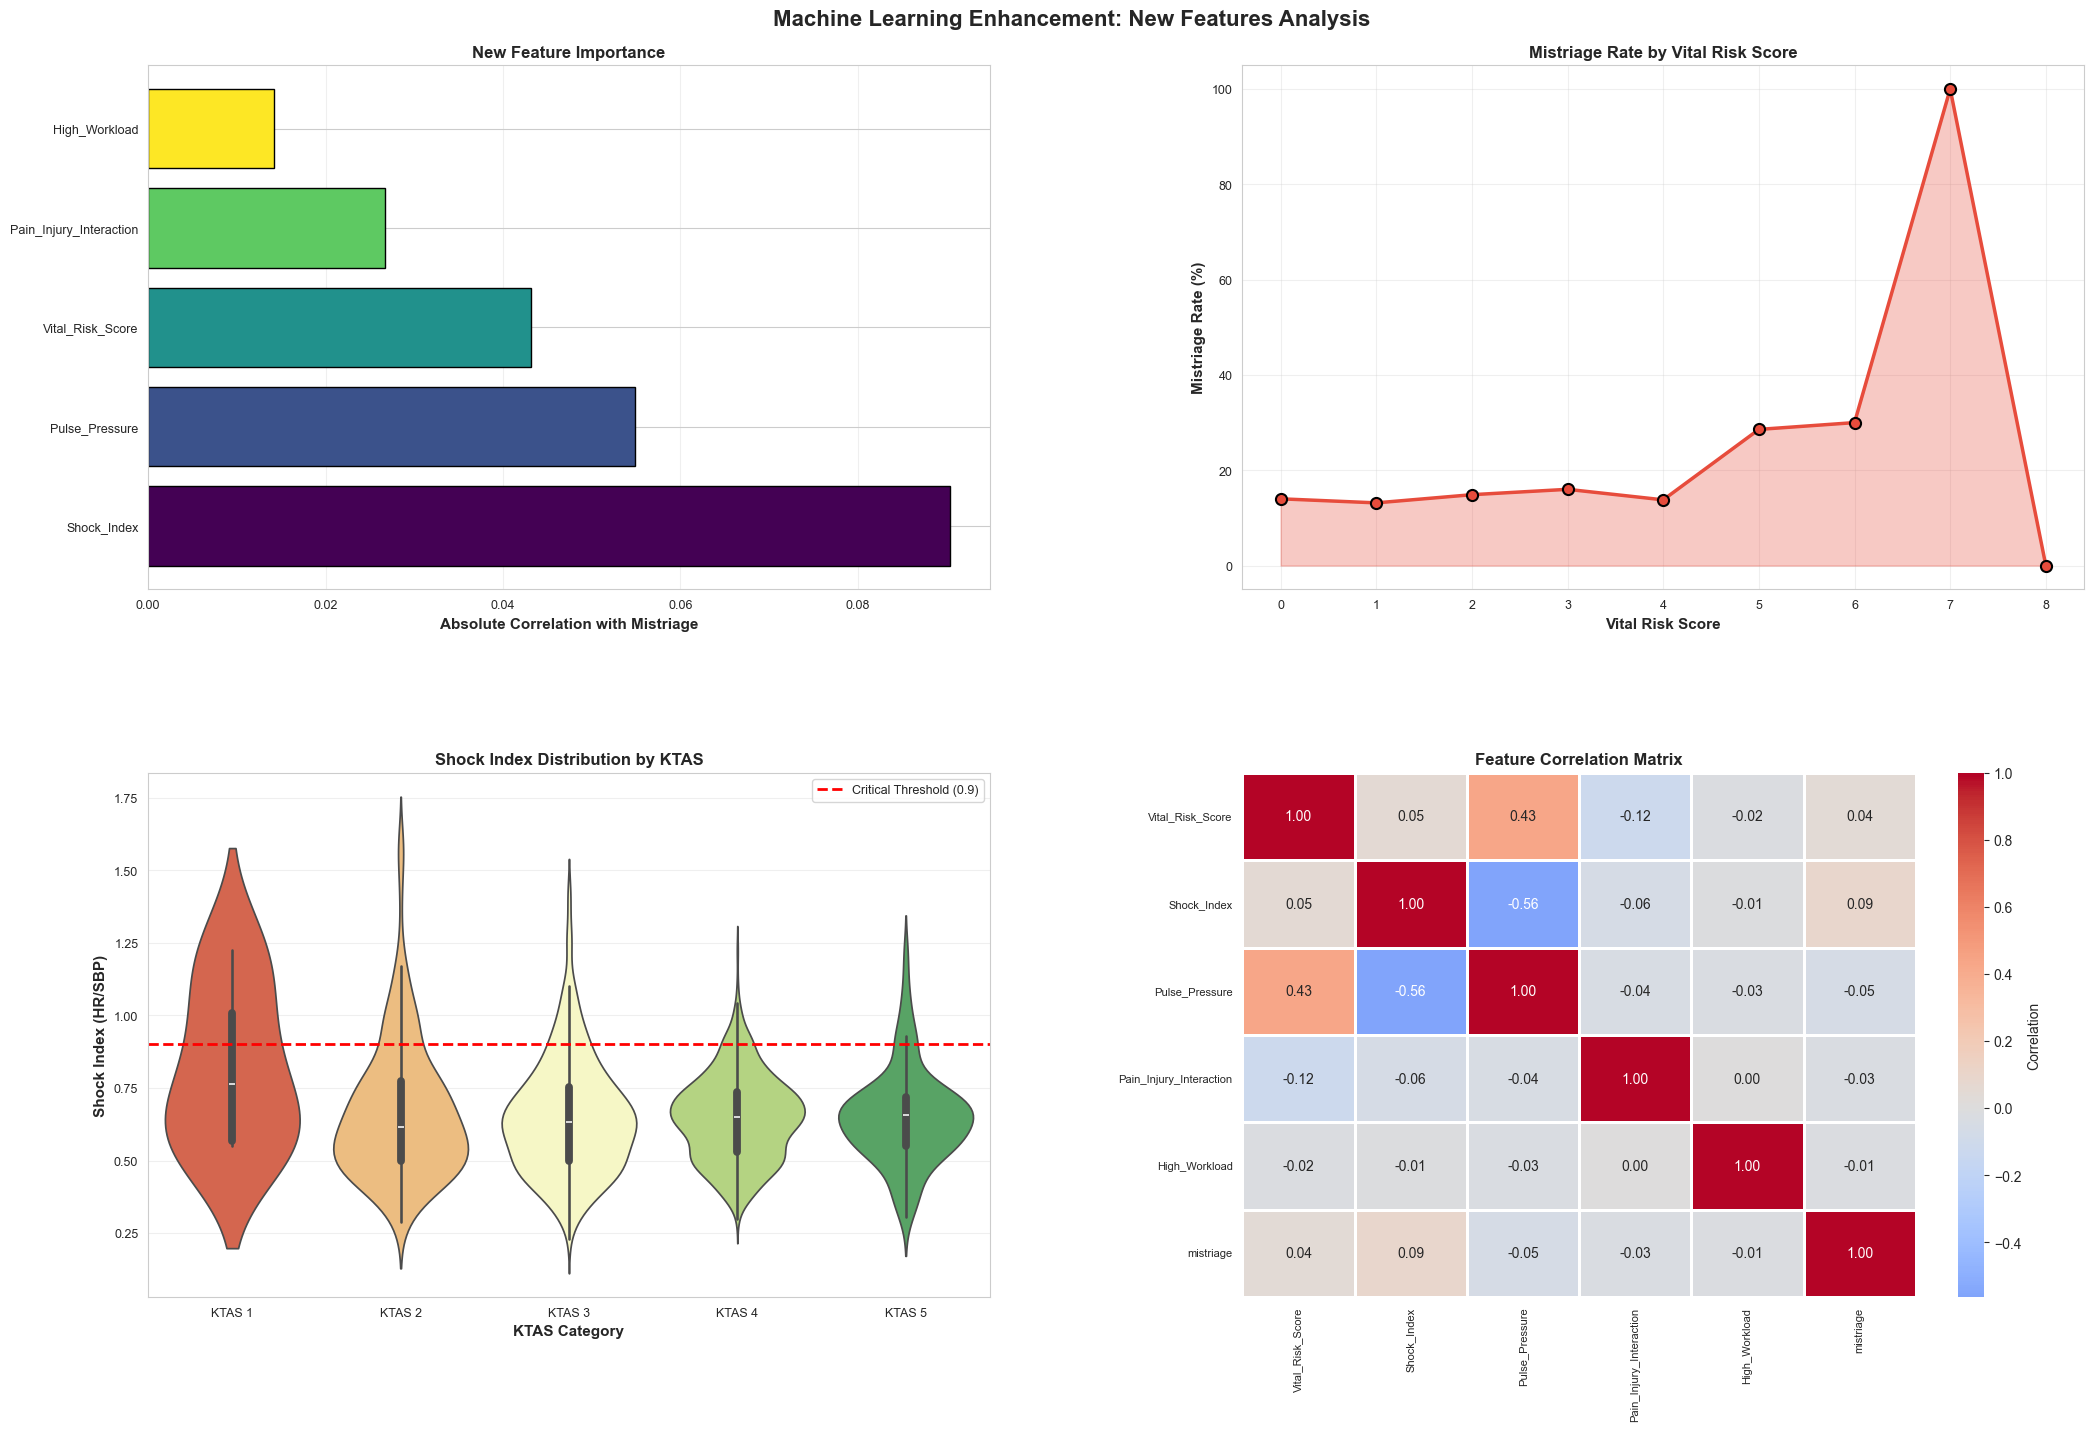


✓ ML enhancement features visualization saved as 'Images/ml_enhancement_features.png'

10.3 Key Predictive Features Identified
--------------------------------------------------------------------------------

Top features for ML models not in specific order (based on EDA):
  1. KTAS_expert (baseline comparison)
  2. Vital_Risk_Score (new composite feature)
  3. NRS_pain (pain level)
  4. Age (patient age)
  5. Shock_Index (HR/SBP ratio)
  6. Mental status
  7. Pulse_Pressure
  8. Respiratory Rate
  9. High_Workload indicator



In [11]:
print("\n10. MACHINE LEARNING RECOMMENDATIONS")
print("="*80)

print("\n10.1 Feature Engineering Opportunities")
print("-"*80)

# Create new features based on EDA insights
print("\n✓ Creating Enhanced Features:")

# 1. Vital Signs Composite Score
df['Vital_Risk_Score'] = (
    (df['SBP'] > 140).astype(int) * 2 +  # Hypertension
    (df['SBP'] < 90).astype(int) * 3 +   # Hypotension (more severe)
    (df['HR'] > 100).astype(int) * 2 +   # Tachycardia
    (df['HR'] < 60).astype(int) * 1 +    # Bradycardia
    (df['RR'] > 20).astype(int) * 2 +    # Tachypnea
    (df['BT'] > 38).astype(int) * 2 +    # Fever
    (df['BT'] < 36).astype(int) * 1      # Hypothermia
)
print("  1. Vital_Risk_Score: Composite score based on abnormal vital signs")

# 2. Age Risk Category
df['Age_Risk'] = pd.cut(df['Age'], bins=[0, 18, 65, 100], labels=['Low', 'Medium', 'High'])
print("  2. Age_Risk: Categorized age groups (Pediatric, Adult, Geriatric)")

# 3. Blood Pressure Pulse Pressure
df['Pulse_Pressure'] = df['SBP'] - df['DBP']
print("  3. Pulse_Pressure: Difference between SBP and DBP")

# 4. Shock Index (HR/SBP)
df['Shock_Index'] = df['HR'] / df['SBP']
print("  4. Shock_Index: HR/SBP ratio (indicator of shock)")

# 5. Pain-Injury Interaction
df['Pain_Injury_Interaction'] = df['Pain'] * df['Injury']
print("  5. Pain_Injury_Interaction: Combined pain and injury indicator")

# 6. Workload Pressure
df['High_Workload'] = (df['Patients number per hour'] > df['Patients number per hour'].median()).astype(int)
print("  6. High_Workload: Binary indicator of ED workload")


print("\n10.2 Feature Importance Analysis")
print("-"*80)

# Calculate correlation with mistriage for new features
new_features = ['Vital_Risk_Score', 'Pulse_Pressure', 'Shock_Index', 
                'Pain_Injury_Interaction', 'High_Workload']

feature_importance = {}
for feature in new_features:
    if feature in df.columns:
        corr = df[[feature, 'mistriage']].corr().iloc[0, 1]
        feature_importance[feature] = abs(corr)

# Sort by importance
feature_importance = dict(sorted(feature_importance.items(), key=lambda x: x[1], reverse=True))

print("\nNew Feature Correlations with Mistriage:")
for feature, importance in feature_importance.items():
    print(f"  • {feature:30s}: {importance:.4f}")

# Visualize feature importance
fig = plt.figure(figsize=(22, 14))
gs = fig.add_gridspec(2, 2, hspace=0.35, wspace=0.3, top=0.94, bottom=0.06, left=0.08, right=0.96)

# 1. Feature Importance Bar Chart
ax1 = fig.add_subplot(gs[0, 0])
features = list(feature_importance.keys())
importances = list(feature_importance.values())
colors_imp = plt.cm.viridis(np.linspace(0, 1, len(features)))
ax1.barh(features, importances, color=colors_imp, edgecolor='black', linewidth=1)
ax1.set_xlabel('Absolute Correlation with Mistriage', fontsize=11, fontweight='bold')
ax1.set_title('New Feature Importance', fontsize=12, fontweight='bold')
ax1.tick_params(axis='both', labelsize=9)
ax1.grid(axis='x', alpha=0.3)

# 2. Vital Risk Score Distribution
ax2 = fig.add_subplot(gs[0, 1])
risk_mistriage = df.groupby('Vital_Risk_Score')['mistriage'].apply(lambda x: (x > 0).sum() / len(x) * 100)
ax2.plot(risk_mistriage.index, risk_mistriage.values, marker='o', linewidth=2.5, 
         markersize=8, color='#E74C3C', markeredgecolor='black', markeredgewidth=1.5)
ax2.fill_between(risk_mistriage.index, risk_mistriage.values, alpha=0.3, color='#E74C3C')
ax2.set_xlabel('Vital Risk Score', fontsize=11, fontweight='bold')
ax2.set_ylabel('Mistriage Rate (%)', fontsize=11, fontweight='bold')
ax2.set_title('Mistriage Rate by Vital Risk Score', fontsize=12, fontweight='bold')
ax2.tick_params(axis='both', labelsize=9)
ax2.grid(alpha=0.3)

# 3. Shock Index Distribution by KTAS
ax3 = fig.add_subplot(gs[1, 0])
shock_data = df[df['Shock_Index'].notna() & (df['Shock_Index'] < 2)]  # Filter extreme outliers
ktas_categories = shock_data['KTAS_RN'].apply(lambda x: f'KTAS {x}')
shock_plot_df = pd.DataFrame({'Shock_Index': shock_data['Shock_Index'], 'KTAS': ktas_categories})
ktas_order = [f'KTAS {i}' for i in range(1, 6)]
sns.violinplot(data=shock_plot_df, x='KTAS', y='Shock_Index', order=ktas_order, palette='RdYlGn', ax=ax3)
ax3.axhline(0.9, color='red', linestyle='--', linewidth=2, label='Critical Threshold (0.9)')
ax3.set_xlabel('KTAS Category', fontsize=11, fontweight='bold')
ax3.set_ylabel('Shock Index (HR/SBP)', fontsize=11, fontweight='bold')
ax3.set_title('Shock Index Distribution by KTAS', fontsize=12, fontweight='bold')
ax3.tick_params(axis='both', labelsize=9)
ax3.legend(fontsize=9)
ax3.grid(axis='y', alpha=0.3)

# 4. Feature Correlation Heatmap
ax4 = fig.add_subplot(gs[1, 1])
correlation_features = ['Vital_Risk_Score', 'Shock_Index', 'Pulse_Pressure', 
                        'Pain_Injury_Interaction', 'High_Workload', 'mistriage']
corr_matrix = df[correlation_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            ax=ax4, linewidths=1, linecolor='white', cbar_kws={'label': 'Correlation'})
ax4.set_title('Feature Correlation Matrix', fontsize=12, fontweight='bold')
ax4.tick_params(axis='both', labelsize=8)

fig.suptitle('Machine Learning Enhancement: New Features Analysis', fontsize=16, fontweight='bold')

plt.savefig('Images/ml_enhancement_features.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ ML enhancement features visualization saved as 'Images/ml_enhancement_features.png'")

print("\n10.3 Key Predictive Features Identified")
print("-"*80)
print("""
Top features for ML models not in specific order (based on EDA):
  1. KTAS_expert (baseline comparison)
  2. Vital_Risk_Score (new composite feature)
  3. NRS_pain (pain level)
  4. Age (patient age)
  5. Shock_Index (HR/SBP ratio)
  6. Mental status
  7. Pulse_Pressure
  8. Respiratory Rate
  9. High_Workload indicator
""")


11. SUMMARY & CONCLUSIONS

EXECUTIVE SUMMARY: Emergency Department Triage Analysis
------------------------------------------------------------------------

This comprehensive exploratory data analysis examined 1,267 emergency department
patient records to understand triage patterns and identify opportunities for
improving triage accuracy using machine learning.

KEY FINDINGS:
-------------

1. DATASET CHARACTERISTICS
   • 1,267 patient records with 24 variables
   • 54.3% missing data in Saturation (oxygen levels)
   • Balanced sex distribution (52% Male, 48% Female)
   • Mean age: 54.4 years (range: 16-96)

2. TRIAGE ACCURACY
   • Overall Mistriage Rate: 14.68%
   • Under-triage: 4.34% (more dangerous - patients triaged as less urgent)
   • Over-triage: 10.34% (resource inefficiency)
   • Emergency cases (KTAS 1-3): 53.6%
   • Non-Emergency cases (KTAS 4-5): 46.4%

3. VITAL SIGNS PATTERNS
   • SBP: Mean 133.7 mmHg (many patients hypertensive)
   • DBP: Mean 79.8 mmHg (generally norm

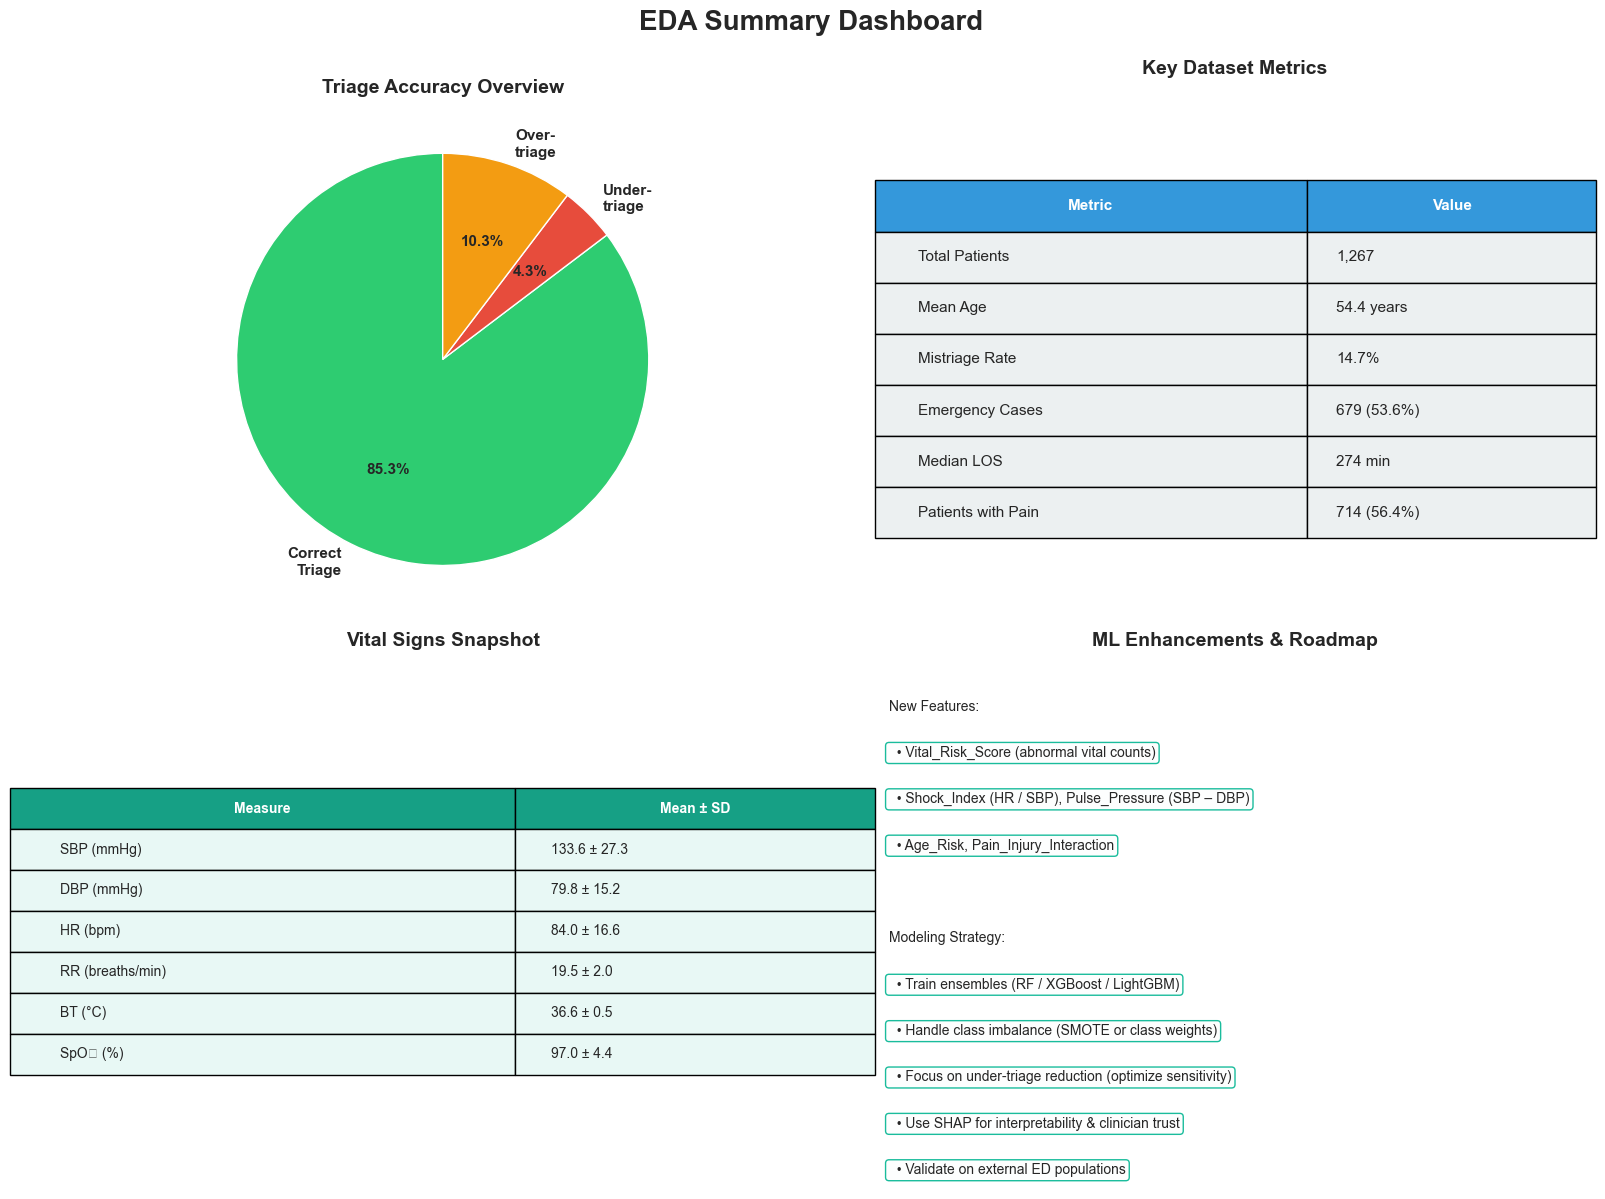


✓ Final summary dashboard saved as 'Images/eda_summary_dashboard.png'

✓ All visualizations and analysis complete!


In [12]:
print("\n11. SUMMARY & CONCLUSIONS")
print("="*80)

print("""
EXECUTIVE SUMMARY: Emergency Department Triage Analysis
------------------------------------------------------------------------

This comprehensive exploratory data analysis examined 1,267 emergency department
patient records to understand triage patterns and identify opportunities for
improving triage accuracy using machine learning.

KEY FINDINGS:
-------------

1. DATASET CHARACTERISTICS
   • 1,267 patient records with 24 variables
   • 54.3% missing data in Saturation (oxygen levels)
   • Balanced sex distribution (52% Male, 48% Female)
   • Mean age: 54.4 years (range: 16-96)

2. TRIAGE ACCURACY
   • Overall Mistriage Rate: 14.68%
   • Under-triage: 4.34% (more dangerous - patients triaged as less urgent)
   • Over-triage: 10.34% (resource inefficiency)
   • Emergency cases (KTAS 1-3): 53.6%
   • Non-Emergency cases (KTAS 4-5): 46.4%

3. VITAL SIGNS PATTERNS
   • SBP: Mean 133.7 mmHg (many patients hypertensive)
   • DBP: Mean 79.8 mmHg (generally normal)
   • HR: Mean 84.0 bpm (normal range)
   • RR: Mean 19.5 breaths/min (normal)
   • BT: Mean 36.6°C (normal)
   • Saturation: Mean 97.0% (normal, where available)

4. MISTRIAGE RISK FACTORS
   • Higher mistriage in Non-Emergency category (17.9% vs 11.9%)
   • Senior patients (>70) show higher over-triage (13.7%)
   • Pain level shows positive correlation with mistriage
   • KTAS nurse-expert disagreement strongly predicts mistriage (96% correlation)

5. CLINICAL INSIGHTS
   • 56.4% of patients present with pain
   • 19.3% have injuries
   • Median length of stay: 274 minutes (4.6 hours)
   • KTAS_RN and KTAS_expert highly correlated (r=0.88)

MACHINE LEARNING RECOMMENDATIONS:
----------------------------------

1. NEW FEATURES CREATED:
   ✓ Vital_Risk_Score: Composite abnormal vital signs indicator
   ✓ Shock_Index: HR/SBP ratio for shock detection
   ✓ Pulse_Pressure: SBP-DBP difference
   ✓ KTAS_Agreement: Nurse-expert consensus indicator
   ✓ Age_Risk: Categorized age groups
   ✓ Pain_Injury_Interaction: Combined symptom indicator

2. RECOMMENDED ML APPROACHES:
   • Ensemble Methods (Random Forest, XGBoost, LightGBM)
   • Handle class imbalance with SMOTE or class weights
   • Feature interactions (polynomial features)
   • Hyperparameter optimization with Bayesian methods
   • Model interpretability with SHAP values

LIMITATIONS & FUTURE WORK:
--------------------------
• Missing saturation data (54%) limits respiratory assessment
• No temporal patterns (time of day, day of week)
• Limited to 1 year of data
• No patient outcomes data for validation
• Consider external validation on different ED populations

CONCLUSION:
-----------
This EDA provides a solid foundation for triage systems.
The identified patterns, new features, and recommended techniques offer
clear pathways to build an ML model. The focus on interpretability and clinical relevance ensures
that improvements will be actionable in real ED settings.
""")

print("\n" + "="*80)
print("END OF EXPLORATORY DATA ANALYSIS REPORT")
print("="*80)

# Create a final summary visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('EDA Summary Dashboard', fontsize=20, fontweight='bold', y=0.995)

# Load data for final viz
df = pd.read_csv('data.csv', sep=';', encoding='latin-1')

def clean_numeric(series):
    if series.dtype == 'object':
        return pd.to_numeric(series.str.replace(',', '.'), errors='coerce')
    return series

numeric_cols = ['NRS_pain', 'SBP', 'DBP', 'HR', 'RR', 'BT', 'Saturation']
for col in numeric_cols:
    df[col] = clean_numeric(df[col])

# 1. Overall Mistriage Summary (top-left)
ax1 = axes[0, 0]
mistriage_summary = df['mistriage'].value_counts().sort_index()
labels = ['Correct\nTriage', 'Under-\ntriage', 'Over-\ntriage']
colors = ['#2ECC71', '#E74C3C', '#F39C12']
wedges, texts, autotexts = ax1.pie(
    mistriage_summary,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    textprops={'fontsize': 11, 'fontweight': 'bold'}
)
ax1.set_title('Triage Accuracy Overview', fontsize=14, fontweight='bold')

# 2. Key Metrics Table (top-right)
ax2 = axes[0, 1]
ax2.axis('off')
metrics_data = [
    ['Total Patients', f"{len(df):,}"],
    ['Mean Age', f"{df['Age'].mean():.1f} years"],
    ['Mistriage Rate', f"{(df['mistriage'] > 0).sum() / len(df) * 100:.1f}%"],
    ['Emergency Cases',
     f"{(df['KTAS_RN'] <= 3).sum()} ({(df['KTAS_RN'] <= 3).sum()/len(df)*100:.1f}%)"],
    ['Median LOS', f"{df['Length of stay_min'].median():.0f} min"],
    ['Patients with Pain',
     f"{(df['Pain'] == 1).sum()} ({(df['Pain'] == 1).sum()/len(df)*100:.1f}%)"],
]
table = ax2.table(
    cellText=metrics_data,
    colLabels=['Metric', 'Value'],
    cellLoc='left',
    loc='center',
    colWidths=[0.6, 0.4]
)
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2.5)
for i in range(len(metrics_data) + 1):
    if i == 0:
        table[(i, 0)].set_facecolor('#3498DB')
        table[(i, 1)].set_facecolor('#3498DB')
        table[(i, 0)].set_text_props(weight='bold', color='white')
        table[(i, 1)].set_text_props(weight='bold', color='white')
    else:
        table[(i, 0)].set_facecolor('#ECF0F1')
        table[(i, 1)].set_facecolor('#ECF0F1')
ax2.set_title('Key Dataset Metrics', fontsize=14, fontweight='bold', pad=20)

# 3. Vital Signs Snapshot (bottom-left)
ax3 = axes[1, 0]
ax3.axis('off')
vital_metrics = [
    ['SBP (mmHg)',       f"{df['SBP'].mean():.1f} ± {df['SBP'].std():.1f}"],
    ['DBP (mmHg)',       f"{df['DBP'].mean():.1f} ± {df['DBP'].std():.1f}"],
    ['HR (bpm)',         f"{df['HR'].mean():.1f} ± {df['HR'].std():.1f}"],
    ['RR (breaths/min)', f"{df['RR'].mean():.1f} ± {df['RR'].std():.1f}"],
    ['BT (°C)',          f"{df['BT'].mean():.1f} ± {df['BT'].std():.1f}"],
    ['SpO₂ (%)',         f"{df['Saturation'].mean():.1f} ± {df['Saturation'].std():.1f}"],
]
vital_table = ax3.table(
    cellText=vital_metrics,
    colLabels=['Measure', 'Mean ± SD'],
    cellLoc='left',
    loc='center',
    colWidths=[0.7, 0.5]
)
vital_table.auto_set_font_size(False)
vital_table.set_fontsize(10)
vital_table.scale(1, 2.0)
for (r, c), cell in vital_table.get_celld().items():
    if r == 0:
        cell.set_facecolor('#16A085')
        cell.set_text_props(weight='bold', color='white')
    else:
        cell.set_facecolor('#E8F8F5')
ax3.set_title('Vital Signs Snapshot', fontsize=14, fontweight='bold', pad=20)

# 4. ML Enhancements / Roadmap (bottom-right)
ax4 = axes[1, 1]
ax4.axis('off')
ax4.set_title('ML Enhancements & Roadmap', fontsize=14, fontweight='bold', pad=20)

ml_lines = [
    "New Features:",
    "  • Vital_Risk_Score (abnormal vital counts)",
    "  • Shock_Index (HR / SBP), Pulse_Pressure (SBP – DBP)",
    "  • Age_Risk, Pain_Injury_Interaction",
    "",
    "Modeling Strategy:",
    "  • Train ensembles (RF / XGBoost / LightGBM)",
    "  • Handle class imbalance (SMOTE or class weights)",
    "  • Focus on under-triage reduction (optimize sensitivity)",
    "  • Use SHAP for interpretability & clinician trust",
    "  • Validate on external ED populations",
]
y = 0.95
for line in ml_lines:
    ax4.text(
        0.02, y, line,
        fontsize=10,
        va='top',
        ha='left',
        bbox=None if not line or line.endswith(':')
             else dict(boxstyle='round,pad=0.25',
                       facecolor='#FDFEFE',
                       edgecolor='#1ABC9C',
                       linewidth=1.0)
    )
    y -= 0.09

plt.tight_layout()
plt.savefig('Images/eda_summary_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Final summary dashboard saved as 'Images/eda_summary_dashboard.png'")
print("\n✓ All visualizations and analysis complete!")

# Conclusion:

I was generally interested in this dataset because ML models are being researched as more effective uses for triage systems. I wanted to find data to showcase traditional triage systems and where it might lack, and then build an ML model in the future off of that. That is why this dataset was appealing to me, and I believe that we can already see above many features that showcase higher percentages of mistriage when done in the traditional KTAS method. There are also other traditional triage methods that could be assessed in the future. 

# Citations:

Anthropic. (2025, December 1). Coding formulation and markdown synthesizer[Generative AI chat]. Claude Sonnet 4.5. https://claude.ai
- I used Claude for formulating a lot of the code by putting in ideas and getting back the example codes above in its object oriented structure. I also used it to summarize the data into a markdown that I checked to be correct for better readability of the notebook. All of the code above was optimized using Claude including some interpretations to read out exact values in the text based print line discussions.

Emergency service - triage application. Kaggle. (2021). https://www.kaggle.com/datasets/ilkeryildiz/emergency-service-triage-application/data 

Park, J. B., Lee, J., Kim, Y. J., Lee, J. H., & Lim, T. H. (2019). Reliability of Korean Triage and Acuity Scale: Interrater Agreement between Two Experienced Nurses by Real-Time Triage and Analysis of Influencing Factors to Disagreement of Triage Levels. Journal of Korean medical science, 34(28), e189. https://doi.org/10.3346/jkms.2019.34.e189